<a href="https://colab.research.google.com/github/isa-ulisboa/greends-pml/blob/main/ML_overview_with_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practical Machine Learning**

Masters in Green Data Science, ISA/ULisboa, 2023-2024

Instructor: Manuel Campagnolo mlc@isa.ulisboa.pt

# Overview of Machine Learning (ML)

In this course we are dealing with data sets of *labeled examples*. Examples can be scalar numbers, rows of tabular data, images, etc. For tabular data, we refer the to columns as *explanatory variables* (sometimes also called *independent* or *descriptive* variables).

Labels can be categorical, ordinal or continuous. Labels can be refered to as the *response variable* (or *dependent* variable). They are also called *targets*. Typically, we the problems are called:
1. *Regression problems*, when the labels are continuous.
2. *Classification problems*, when the labels are categorical.

The distinction is not always clear. Some problems can be considered either as regression or classification problems.

Given a ML problem, i.e. a set of labeled examples, the goal is to build a function $f$ that maps examples to labels or, in other words, that predicts the label from the example.

The outputs of $f$ are called *predictions* or *predicted values*, and the actual labels of the examples are called *actual values* or *target values*.




## Python packages

In this ML course, the main Python packages are:



1. **Pytorch**: PyTorch is an optimized tensor library for deep learning using GPUs and CPUs;  https://pytorch.org/docs/stable/index.html

2. **Tensor Flow**: the alternative to PyTorch from Google.

3. **Scikit-learn**: Another high-level package build on `NumPy`, `SciPy`, and `matplotlib` which covers most ML techniques except deep learning;  https://scikit-learn.org/stable/index.html.

4. **Fastai**, a high-level package build from `pytorch`. A description of `fastai` is available in the paper *Howard, J.; Gugger, S. Fastai: A Layered API for Deep Learning. Information 2020, 11, 108. https://doi.org/10.3390/info11020108* and on the site https://docs.fast.ai/

## Data visualization, pre-processing and feature engineering

Discriminant analysis is a linear technique that helps to visualize numerical data for classification problems. Library `scikit-learn` provides the `LinearDiscriminantAnalysis` (LDA) for that purpose. LDA determines the axis along which between-class variance over within-class variance is largest.


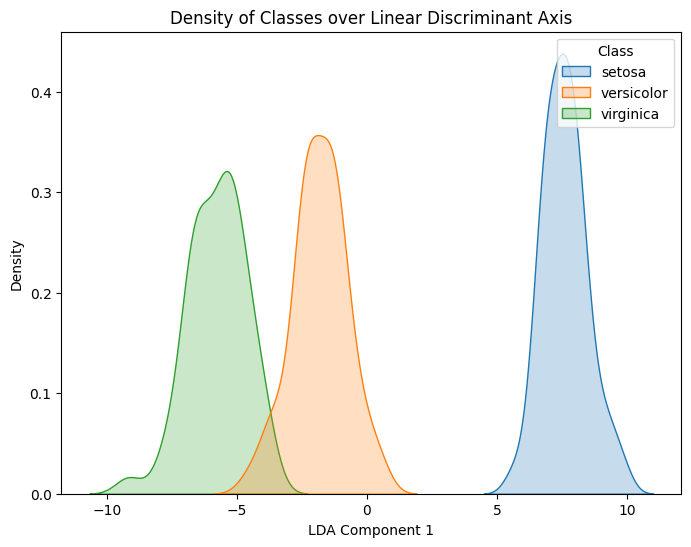

In [ ]:
#@title Script to project the iris data set on the 1st discriminant axis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# Combine the transformed data and target labels into a DataFrame
data = {'LDA Component 1': X_lda.squeeze(), 'Class': target_names[y]}
df = pd.DataFrame(data)

# Plot the result
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='LDA Component 1', hue='Class', fill=True, common_norm=False)
plt.xlabel('LDA Component 1')
plt.title('Density of Classes over Linear Discriminant Axis')
plt.show()

If there are more than 2 classes, we can define more than one discriminant axis. In particular, it is easy to visualize data projected onto the first discriminant plane as in the following example.

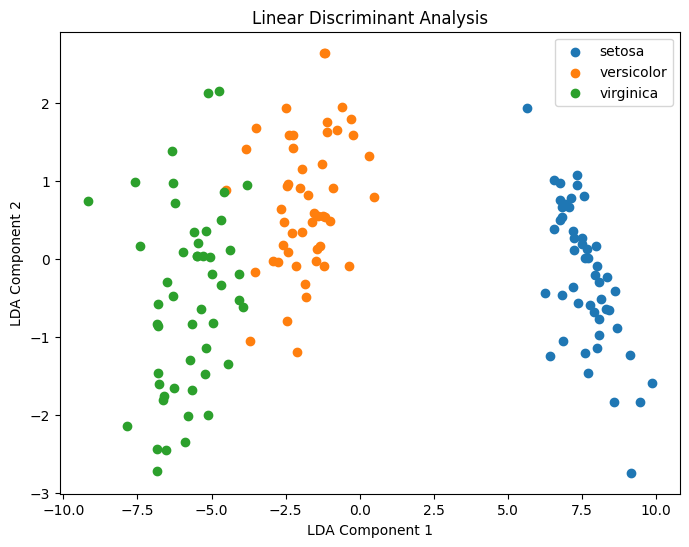

In [ ]:
#@title Script to project the iris data set on the 1st discriminant plane

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the result
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], label=target_name)

plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Linear Discriminant Analysis')
plt.legend()
plt.show()


Linear visualization techniques are not flexible enough to address problems where classes (example with the same labels) are not, at least approximately, linearly separable. There are many non-linear techniques which can be applied to large data sets that also perform dimensionality reduction and permit visualization of very complex data sets.

Two relevant papers that describe fast techniques for large data sets:
- [t-SNE-CUDA: GPU-Accelerated t-SNE and its Applications to Modern Data](https://arxiv.org/pdf/1807.11824)
- [UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction](https://arxiv.org/pdf/1802.03426)

The following script illustrates those techniques, and compares them with LDA, for creating 2-dimensional and 3-dimensional plots. In the examples, three data sets are compared: `digits`, `wine` and `wine quality`.

In [ ]:
#@title Script to apply dimensionality reduction techniques t-SNE, UMAP and LDA to several data sets
!pip install umap-learn[plot]
!pip install ucimlrepo
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Data
from sklearn.datasets import load_digits, load_wine
from ucimlrepo import fetch_ucirepo
# plotly
import plotly.express as px
import matplotlib.pyplot as plt

# constants
DATA='wine quality' # 'digits', 'wine', 'wine quality'
WINE_QUALITY_RESPONSE='quality' # 'color' or 'quality' for 'wine quality'
STANDARDIZE=True
K=3 # new data dimension
SHOW_DIGITS=False # for 'digits'
METHOD='umap' #'lda' #'umap' // 'tsne'

# read data; returns X, y (dataframes) and labels (list with the length of y)
if DATA=='digits':
    digits = load_digits(as_frame=True)
    if SHOW_DIGITS:
        fig, ax = plt.subplots(1, 4)
        for i in range(4):
            ax[i].imshow(digits.images[i], cmap='Greys')
        # plt.savefig('figures/05_12.png', dpi=300)
        plt.show()
    y = digits.target # dataframe
    X = digits.data # dataframe
    labels=['digit_'+str(i) for i in y]

if DATA=='wine':
    X, y = load_wine(return_X_y=True, as_frame=True)
    labels=['region'+str(i) for i in y]

if DATA=='wine quality':
    # URL of the white wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
    # load the dataset from the URL
    white_df = pd.read_csv(URL, sep=";")
    # fill the 'color' column
    white_df["color"] = 'white'
    # keep only the first of duplicate items
    white_df = white_df.drop_duplicates(keep='first')
    # URL of the red wine dataset
    URL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
    # load the dataset from the URL
    red_df = pd.read_csv(URL, sep=";")
    # fill the `color` column
    red_df["color"] = 'red'
    # keep only the first of duplicate items
    red_df = red_df.drop_duplicates(keep='first')
    # concatenate to obtain full data set
    df = pd.concat([red_df, white_df], ignore_index=True)
    # define X and y (dataframe)
    X = df.drop(columns=['quality','color'])
    if WINE_QUALITY_RESPONSE=='quality':
        y=df[WINE_QUALITY_RESPONSE] # pandas.core.series.Series
        labels=['quality_'+str(i) for i in y]
    if WINE_QUALITY_RESPONSE=='color':
        y = pd.get_dummies(df[WINE_QUALITY_RESPONSE])['red'].replace({True: 1, False: 0}) # pandas.core.series.Series
        labels=['color_'+str(i) for i in y]

# standardize data
if STANDARDIZE:
    stdsc = StandardScaler().set_output(transform="pandas")
    X = stdsc.fit_transform(X)

# dimensionality reduction
if METHOD=='tsne':
    #In t-SNE, the perplexity may be viewed as a knob that sets the number of effective nearest neighbors. Typically, between 5 and 50. Robust
    tsne = TSNE(n_components=K)#, metric='mahalanobis')
    X_ = tsne.fit_transform(X) # dataframe with K columns
if METHOD=='umap':
    umap=UMAP(n_components=K,n_neighbors=3,min_dist=0.1)
    print(y,type(y))
    X_= umap.fit_transform(X,y) # or just umap.fit_transform(X)
if METHOD=='lda':
    K=min(len(np.unique(labels))-1,K); print('K',K)
    lda = LinearDiscriminantAnalysis(n_components=K)
    X_ = lda.fit_transform(X, y)

# prepare dataframe for plot with plotly.express
proj_names=['proj'+str(i) for i in range(X_.shape[1])]
df=pd.DataFrame(X_,columns=proj_names) # projections of X
df['label']=labels # label

# plots 2D or 3D
def plot_projection_2D(df):
    fig = px.scatter(df, x=proj_names[0], y=proj_names[1],color='label', title='dimension reduction with '+METHOD)
    fig.show()

def plot_projection_3D(df):
    fig = px.scatter_3d(df, x=proj_names[0], y=proj_names[1], z=proj_names[2],color='label', title='dimension reduction with '+METHOD)
    fig.show()

if K==2:
    plot_projection_2D(df)
if K==3:
    plot_projection_3D(df)

0       5
1       5
2       5
3       6
4       5
       ..
5315    6
5316    5
5317    6
5318    7
5319    6
Name: quality, Length: 5320, dtype: int64 <class 'pandas.core.series.Series'>


# Models and parameters


More formally, if $E$ is the set of examples and $L$ is a set that includes the labels, then what we call the *model* is a family of functions $f_{\rm \bf w}$ that depends on a set of parameters ${\rm \bf w}$: $$f_{\rm \bf w}: E → L.$$

It can be more convenient to express the function as depending on the parameters ${\rm \bf w}$ as well as the example ${\rm \bf x}$. The model's predicted label $\hat{y}$ for the example ${\rm \bf x}$ is:

$$\hat{y}=f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w}).$$

ML practicioners use an enormous variety of models, depending on the problem at hand and on the available computational resources to train the model. Models include convolucional neural networks (CNN) for image classification (resnet and other kind of CNNs), neural networks (NN) for classification of tabular data, linear regression models, decision and regression trees, random forest and other ensemble models, among many other models.


<img src="https://drive.google.com/uc?export=view&id=1g7cUxaqoa1ujkRV-BjQKPWsVDFBAYWMb" width="600" >



## Example of a simple model (simple linear regression)

Suppose that our examples are scalar numbers $x_1,\dots, x_n$ and the labels are continuous labels $y_1, \dots, y_n$. We call $x$ the explanatory variable and $y$ the response variable.

Let's consider the simple linear regression model:
$f_{\rm a,b}(x)= a \, x + b$. The model parameters are ${\rm \bf w}=(a,b)$ and the predicted values are given by$\\[1em]$
$$\hat{y}=f(x; {\rm a,b})=a\, x + b.$$

The target  or actual label values are the $y_1, \dots, y_n$, and the predicted label values are the $\hat{y}_1,\dots,\hat{y}_n$.



## Example of a simple model (quadratic regression)

In notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb), a similar simple example is discussed. The only difference is that the model $f_{\rm a,b,c}$ in that example is quadratic instead of linear:

$$f_{\rm a,b,c}(x)= f(x;a,b,c)= a \, x^2 + b \, x + c.$$



# Loss function for regression

In ML, it is usual to call *loss* to the **dissimilarity** between actual and predicted label values for a *set* of labeled examples.

Let ${\rm \bf x}_1, \dots , {\rm \bf x}_n$ be a set of examples with labels $y_1, \dots , y_n$. Let $f_{\rm \bf w}$ be our model. Therefore, the predicted labels are

$$\hat{y}_1=f_{\rm \bf w}({\rm \bf x}_1), \dots, \hat{y}_n=f_{\rm \bf w}({\rm \bf x}_n).$$

The loss over that set of examples is some dissimilarity measure between the actual labels $y_1, \dots , y_n$ and the predicted labels $\hat{y}_1, \dots , \hat{y}_n$.



## Dissimilarity measures to define *loss*


To define loss, we then need to choose an appropriate dissimilarity metric between a set of actual $y_1, \dots , y_n$ and predicted labels $\hat{y}_1, \dots , \hat{y}_n$. The choice depends on the type of problem, and while MAE or RMSE are adequate for *regression* problems, other dissimilarities are used for *classification* problems.




## Examples of loss functions for regression problems (MAE, MSE, Huber)



Above, two common loss functions for regression problems were listed

1. Mean absolute error (MAE), given by $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$; or

2. Mean square error (MSE), given by $\frac{1}{n}\sum_{i=1}^n \left(y_i-\hat{y}_i\right)^2$

In the one hand, MAE is not differentiable everywhere, which is an undesirable property for ML. On the other hand, MSE penalizes too much large differences between actual and predicted values, which means that a single example can constraint strongly the solution.

An alternative is called the Huber loss function, which is differentiable everywhere, and behaves like MSE near the origin and like MAE for large $|y_i-\hat{y}_i|$.


## Examples: simple linear regression and quadratic regression



For the linear regression example, the response variable is continuous. We wish to measure the dissimilarity between the set of actual label values $y_1, \dots , y_n$  and the set of values predicted by the model
$f_{\rm a,b}(x)= a \, x + b$:

$$\hat{y}_1=a\, x_1+ b, \dots, \hat{y}_n=a\, x_n+ b.$$

Since the response is continuous, it makes sense to use a function like the Mean absolute error (MAE), or the  Mean square error (MSE) for the loss.

Notebook [Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb](Lesson3_edited_04-how-does-a-neural-net-really-work.ipynb) discusses a slightly more complex example, with one additional parameter. The only difference is that the generating function is quadratic instead of linear. In that new example, loss is given by MAE, i.e. $\frac{1}{n}\sum_{i=1}^n |y_i-\hat{y}_i|$.

In [ ]:
def mae(preds, acts):
  return (torch.abs(preds-acts)).mean()

The notebook includes code to interactively change the model weights and compute the corresponding values for the MAE loss function.


# ML as an optimization problem



Now, we can define a ML problem as a optimization problem. Given

1.  a set of examples  ${\rm \bf x}_1, \dots , {\rm \bf x}_n$  with labels $y_1, \dots , y_n$
2. a model $f_{\rm \bf w}$
3. a *loss* function $L$

the goal is to determine the optimal set of parameters ${\rm \bf w}$ that minimize the loss $L$ over that set of examples.

## Gradient descent and learning rate

Informally, a gradient measures how much the output of a function changes if you change the inputs a little bit.

Given a model $f_{\rm \bf w}({\rm \bf x})= f({\rm \bf x}; {\rm \bf w})$ and a batch of examples ${\rm \bf x_1}, \dots, {\rm \bf x_n}$, we have seen how we can define a *loss* function

$$L({\rm \bf x_1, \dots, x_n; w})= L_{\rm \bf x_1, \dots, \rm \bf x_n}(\rm \bf w).$$

We can write $L$ just a function of the weights since the ${\rm \bf x_i}$ are fixed for given batch of examples. Our goal is to find the set of weights ${\rm \bf w}$ that minimize $L({\rm \bf w})$. In order to do this iteratively, starting with an arbitrary set of initial weights, we would like to know how $L$ changes with a small change in the weights $\rm \bf w$ from the current set weights ${\rm \bf w}^{*}$.

This  is given by the gradient of $L$ with respect to ${\rm \bf w}$ at ${\rm \bf w}^{*}$, which is a vector of partial derivatives of $L$ with length equal to $m$=number of model parameters.

$$ \nabla L({\rm \bf w}^{*}) = \frac{\partial L}{\partial \rm \bf w}({\rm \bf w}^{*})= \left(\frac{\partial L}{\partial \rm w_1}({\rm \bf w}^{*}), \dots,  \frac{\partial L}{\partial \rm w_m}({\rm \bf w}^{*}) \right).$$

The computation of $\nabla L({\rm \bf w}^{*})$ is usually done by **back-propagation**, which is an automatic differentiation algorithm for calculating gradients for the weights in a neural network graph structure. Back-propagation (aka *backprop*) is an automatic differentiation algorithm that applies the *chain-rule*.

The vector $\nabla L({\rm \bf w}^{*})$ points to the direction from ${\rm \bf w}^{*}$ along which $L$ grows faster, so gradient descent follows the opposite direction $ - \nabla L({\rm \bf w}^{*})$.

![files_in_hugging_face_corn_disease.png](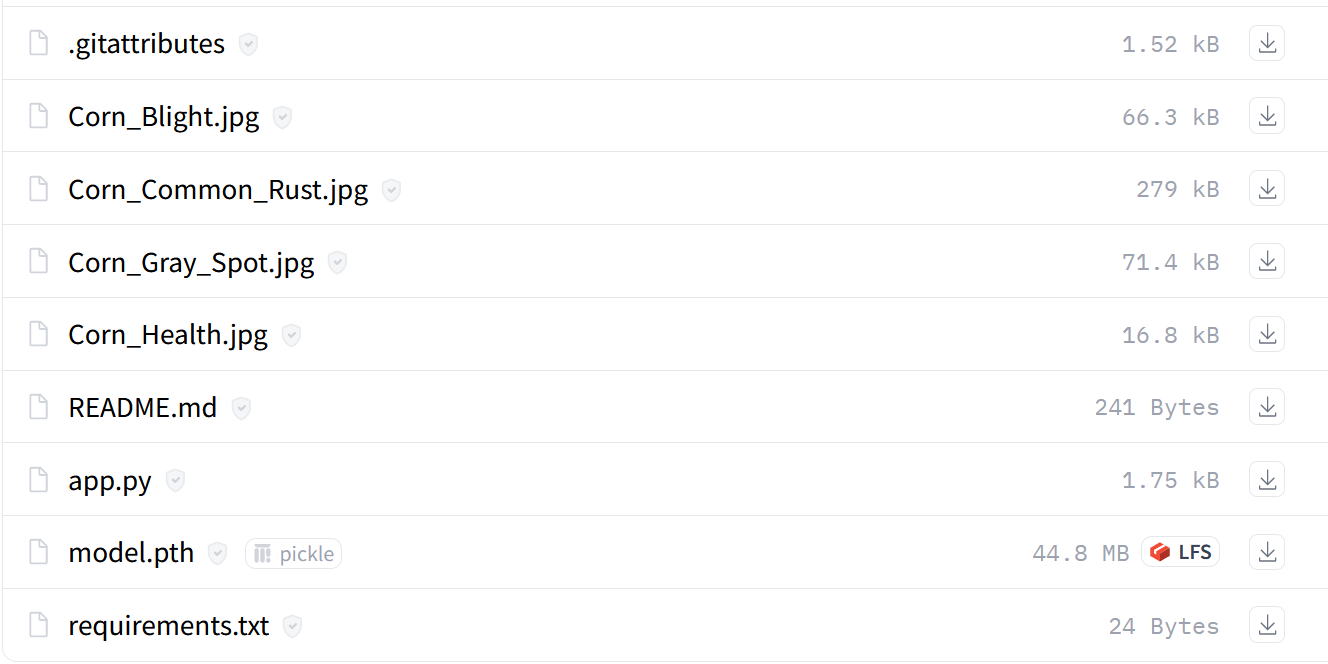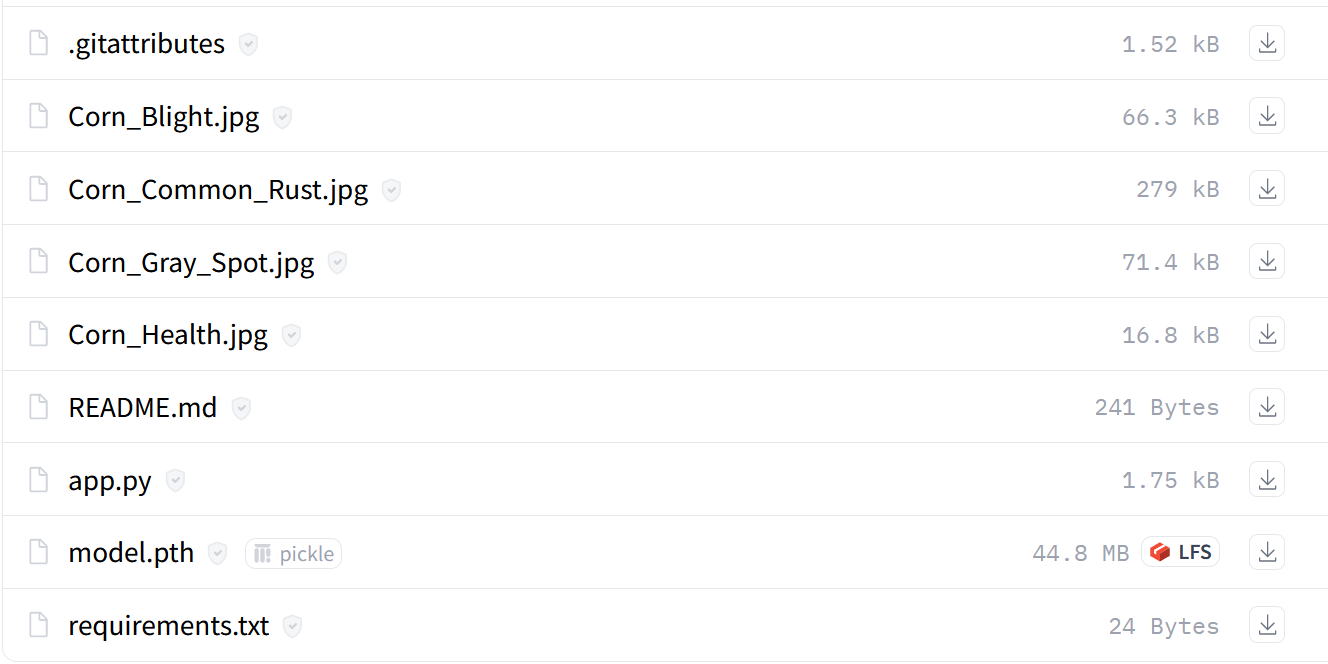)<img src="https://drive.google.com/uc?export=view&id=1-KGjbUaR1l3z879V_eJu7JutnSutqbdC" width="500" >


To simplify, let's suppose that all examples are visited before updating the set of weights.
Then, the steps of gradient descent algorithm are the following. In ML, one *epoch* corresponds to the processing of the totally of examples in the data set. So, for instance, if the algorithm runs for 20 epochs, then the model is applied to all examples 20 times.

---

1. Choose an initial set of weights ${\rm \bf w}^{*}$

2. For $i = 1, \dots, E$, where $E$ is the number of epochs, do:

   i) Cumpute $\nabla L({\rm \bf w}^{*})$

   ii) Update ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*}) $, where $\eta >0 $ is the learning rate.

---

The choice of the *learning rate* is critical for a good performance of the algorithm. A very small learning rate will permit a good approximation of the gradient flow by the algorithm (see next figure). But if the step is too small, many epochs will be needed to get a good solution.

<img src="https://drive.google.com/uc?export=view&id=12c4X3po4-xVGUJKzyKC56lwl4ZEmXqWa" width="400" >



ML practicioners use many different techniques to determine the *learning rate*. In particular, the learning rate can be adaptive and change along epochs, which is a standard approach in ML. An adaptive learning rate is provided by the `fine_tune` method used in   [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb):

    learn = vision_learner(dls, resnet18, metrics=error_rate)
    learn.fine_tune(3)

In alternative, package `fastai` contains a method `lr_find()` that helps to find a adequate lerning rate, as discussed at 1:20' of Lesson 5 of [Practical Deep Learning for Coders 2022](https://course.fast.ai/), where it is used in the following chunk of code:

    learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])
    learn.lr_find(suggest_funcs=(slide, valley))
    learn.fit(16, lr=0.03)

The value `0.03` used with `learn.fit` is derived from the visual interpretation of the output of `learn.lr_find(suggest_funcs=(slide, valley))` which is the following.

<img src="https://drive.google.com/uc?export=view&id=1bAH7oLrIsuISeZMr749FkI1rkmDp-hw-" width="500" >


Let's consider a very simple example, where we try to fit a model to a pairs of observation that are linearly related. Below, we discuss a `PyTroch` gradient descent script for the linear regression problem, and we compare the result with the optimal coefficients obtained by *least squares*. The code below shows how *training loss* is  computed.

The most specific part of the algorithm is the gradient computation. Note that the *gradient machinery* of `PyTorch` is turned-on for each weight with `requires_grad = True` as in the following case:

    coeffs=torch.tensor([-20.,-10.]).requires_grad_()

Then, the derivatives can be computed for any continuous function of the weights in tensor `coeffs`. In particular, the *loss* $L$ is defined as a function (that can be arbitrarily complicated) of the weights, and the *gradient* $\nabla L({\rm \bf w}^{*})$ for the current set of weights ${\rm \bf w}^{*}$ is computed with

    loss.backward()

Finally, the weights are updated with

    coeffs.sub_(coeffs.grad * step_size)

where method `sub_` is substraction for weight updating ${\rm \bf w}^{*}:={\rm \bf w}^{*} - \eta \, \nabla L({\rm \bf w}^{*})$, and  the learning rate $\eta$ is called `step_size` in the code.

Try changing the learning rate to see what happens (try for instance `step_size=0.1`).

Least square LR coefficients: [2.0237875] [[-5.0023813]]
coeffs found by stochastic gradient descent: [ 1.608836 -4.990727]


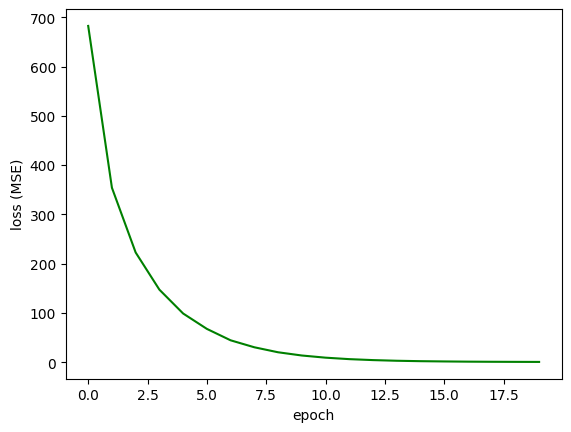

In [ ]:
#@title Script for stochastic gradient descent with Pytorch, train only data, applied to synthetic LR data
# This example illustrates: gradient descent with PyTorch, train only, stochastic gradient descent (SGD)
import matplotlib.pyplot as plt
import torch
import numpy as np
torch.manual_seed(42)

step_size = 0.001  # learning rate
iter = 20  # number epochs

############################################ Creating synthetic data
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)  # view converts to rank-2 tensor with one column
func = -5 * X + 2
# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(X.size())

########################################## Baseline: Linear regression LS solution
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print('Least square LR coefficients:',reg.intercept_,reg.coef_)

####################################################### Gradient Descent
# initial weights
coeffs = torch.tensor([-20., -10.], requires_grad=True)

# defining the function for prediction (linear regression)
def calc_preds(x):
    return coeffs[0] + coeffs[1] * x

# Computing MSE loss for one example
def calc_loss_from_labels(y_pred, y):
    return torch.mean((y_pred - y) ** 2) # mean applies to a single value in this case

# lists to store losses for each epoch
training_losses = []

# epochs
for i in range(iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(X)
    loss = calc_loss_from_labels(y_pred, y)
    training_losses.append(loss.item())

    # Stochastic Gradient Descent (SGD): update weights after each data point
    for j in range(X.shape[0]):
        # randomly select a data point
        idx = np.random.randint(X.shape[0])
        x_point = X[idx]
        y_point = y[idx]

        # making a prediction in forward pass
        y_pred = calc_preds(x_point)

        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, y_point)

        # compute gradient
        loss.backward()

        # update coeffs
        with torch.no_grad():
            coeffs.sub_(coeffs.grad * step_size)
            # zero gradients
            coeffs.grad.zero_() # PyTorch accumulates the gradients on subsequent backward passes. So, the default action has been set to accumulate (i.e. sum) the gradients on every loss.backward() call.

print('coeffs found by stochastic gradient descent:', coeffs.detach().numpy())

# plot training loss along epochs
plt.plot(training_losses, '-g')
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.show()


## A simple linear model: the perceptron

The example above envolved a linear regression model. That model is closely related to a basic Machine Learning model which is known as the *perceptron* .

<img src="https://drive.google.com/uc?export=view&id=1HqHfJn7ejJMGeAa5fTTQzW_myubIDsDh" width="600" >


The *perceptron* model can be written as

$$f_{\rm \bf w}(x_1,\dots,x_k)= \sigma (w_0 + w_1 \, x_1 + \dots + w_k \, x_k)$$

where $\sigma(.)$ is called an activation function, which is defined by a discontinuity like the following one

$$\sigma(z) = \left\{\begin{align}
1 &, &  z \ge 0 \\
-1 &, &  z < 0 \\
\end{align} \right.$$

The term $w_0 + w_1 \, x_1 + \dots + w_k \, x_k$ corresponds to the core component of multiple linear regression model:
$$Y=w_0 + w_1 \, x_1 + \dots + w_k \, x_k + \varepsilon,$$
where $\varepsilon$ represents the random errors.

For that model, the predicted values are $\hat{y}=w_0 + w_1 \, x_1 + \dots + w_k \, x_k$ and the absolute loss for each observation is $L=|\hat{y}-y|$. Since the observation $y$ does not depend on the weights, the partial derivates of the loss with respect to the weights are simply
$$\nabla L({\rm \bf w}^{*})=(1, \pm x_1, \dots, \pm x_k),$$
where the sign depends on the sign of $\hat{y}-y$ for each observation.

The following code, which does not use `PyTorch` but just the basic funcionalities of Python and `numpy` does exactly that. This code uses object oriented programming and creates a class `Perceptron` with methods `step_fit`, where the update of the model parameters is performed, `net_input` and `predict` which are needed to apply *gradient descent*. However, since the code is used to illustrate graphically the iterative process, the code also includes several methods that are needed to create an animation with `FuncAnimation`. The algorithm is applied to the `iris` data set, to only two species at the time. Only the two first explanatory variables are used for illustrative purposes.


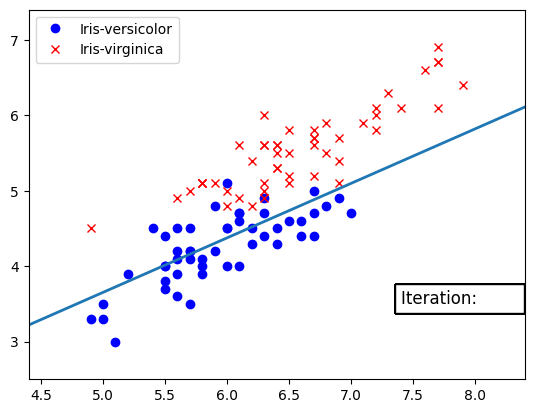

In [ ]:
#@title Script to create a Perceptron class and an animation and apply it to the iris data set
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        #iterate over labelled dataset updating weights for each features accordingly (stochastic gradient descent)
        for xi, label in zip(X, y):
            update = self.eta * (label-self.predict(xi))
            self.w_[1:] += update * xi
            self.w_[0] += update
        return self

    #compute the net input i.e scalar sum of X and the weights plus the bias value
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    #predict a classification for a sample of features X
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def init_plot(self):
        self.line.set_data([],[])
        return self.line,

    def animate(self, iteration_number, X, y):
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        if iteration_number%2==0:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, f'Iteration: {iteration_number}', fontsize=12)  # Update iteration number
        else:
            self.ax.text(max(X[:,0])-0.5, min(X[:,1])+0.5, 'Iteration:'+' '*8, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)

        return x, y

    def animated_fit(self, X, y):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights

        #here figure must be defined as a variable so it can be passed to FuncAnimation
        self.fig = plt.figure()

        #setting x and y limits with a 0.5 offset
        self.ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))

        #plotting our training points
        self.ax.plot(X[0:50, 0],X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0],X[50:100, 1], "rx", label=self.nameB)

        #labelling
        self.ax.legend(loc='upper left')

        #initialization of separation line and our animation object
        self.line, = self.ax.plot([], [], lw=2)
        anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim.save('learning_process.gif', writer='imagemagick')

#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3

#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
#y = np.where(y == 'Iris-setosa', -1, 1)
y = np.where(y == spB['name'], -1, 1)

ppn = Perceptron(eta=0.1, n_iter=150, nameA=spA['name'], nameB=spB['name']) #initializing a new perceptron
ppn.animated_fit(X, y)

## Mini-Batch Gradient Descent

The example before is a case of *stochastic gradient descent* (SGD), where weights are updated after each single example.

However, SGD can be quite erratic since all individual observation affect the search. If one observation has a large *loss*, then the weights will change abruptely to accomodate that, and this and that behaviour can jeopardize the convergence of gradient descent.

In the above example using the `iris` data set, one tried to separate one species from another using SGD (relying just on two explanatory variables for the sake of visualization). As one can see in the animation, the behavior can be pretty erratic, even this is a simple problem that can be solved easily with discriminant analysis techniques.

Given those limitations of SGD, the most common approach in ML is to group examples in batches and update the weights after each batch. One possibility is to include all example in one single batch which leads to the *batch gradient descent* method. In alternative, the examples can be grouped in *mini-batches* of tens or hundreds examples typically.

In short, there are three main possibilities:
1. *stochastic gradient descent*, where weights are updated after each single example;
2. *batch gradient descent*, where weights are updated once per epoch;
3. *mini-batch gradient descent*, which is somewhere in between the other two.

The example below is an adaptation of the earlier  *linear regression* example. It illustrates how weights update are done after each mini-batch of data (i.e. this is a case of *Mini-Batch Gradient Descent*). The *loss* for all examples in a mini-batch are simply combined by the `mean` function.

batch size: 10
coeffs found by gradient descent: [ 1.6460457 -5.0119123]


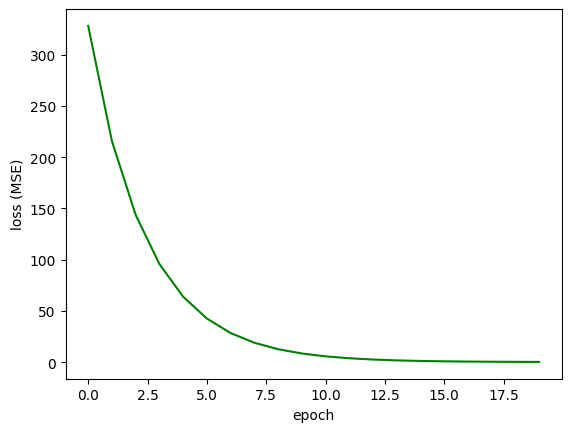

In [ ]:
#@title Script to learn from LR synthetic data, using mini batches, and train only
# This LR example illustrates gradient descent with PyTorch, train only and mini-batches
import matplotlib.pyplot as plt
import torch
import numpy as np
torch.manual_seed(42)

B = 10  # batch size
step_size = 0.01  # learning rate
iter = 20  # number epochs

############################################ Creating synthetic data
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)  # view converts to rank-2 tensor with one column
func = -5 * X + 2
# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(X.size())

# shuffle data
indices = torch.randperm(X.size(0))
X = X[indices]
y = y[indices]

####################################################### Gradient Descent
# initial weights
coeffs = torch.tensor([-20., -10.]).requires_grad_()

# defining the function for prediction (linear regression)
def calc_preds(x):
    return coeffs[0] + coeffs[1] * x

# Computing MSE loss for one batch of examples
def calc_loss_from_labels(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# lists to store losses for each epoch
training_losses = []

# epochs
for i in range(iter):
    # mini-batch gradient descent: weights are updated after each batch
    for idx_start in np.arange(0, X.shape[0], B):
        # create batch
        batch_X = X[idx_start:(idx_start + B), :]
        batch_y = y[idx_start:(idx_start + B):]
        # making a prediction in forward pass
        y_pred = calc_preds(batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            coeffs.sub_(coeffs.grad * step_size)
            # zero gradients (because they add up)
            coeffs.grad.zero_()

    # calculate loss on training data for this epoch
    y_pred_train = calc_preds(X)
    train_loss = calc_loss_from_labels(y_pred_train, y).item() # item returns the value of the tensor as a standard Python number.
    training_losses.append(train_loss)

print('batch size:', B)
print('coeffs found by gradient descent:', coeffs.detach().numpy()) #coeffs.requires_grad_(False))
# plot training losses along epochs
plt.plot(training_losses, '-g')
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.show()

Let's look again that the `iris` data set and the animation of the search process, but now considering mini-batches in alternative to the stochastic strategy. If one tries to discriminate two species which are linearly separable, the perceptron is guaranteed to converge. However, a careful choice of the values of hyperparameters *batch size* and *learning rate* is needed when the classes are not linearly separable.

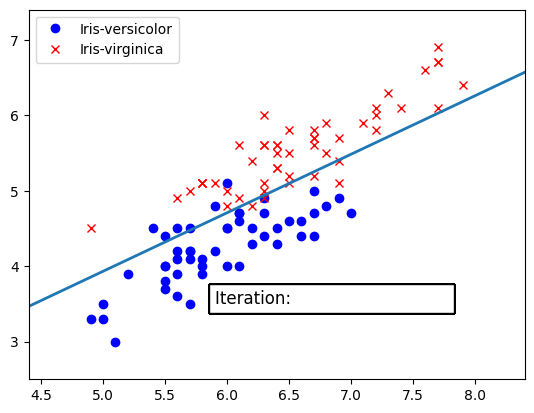

In [ ]:
#@title Script to create a Perceptron class and an animation for the iris data set, using mini batches
from matplotlib.animation import FuncAnimation
from functools import partial
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

class Perceptron():
    #initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, eta=0.1, n_iter=50, batch_size=10, nameA='', nameB=''):
        self.eta = eta
        self.n_iter = n_iter
        self.batch_size = batch_size
        self.nameA = nameA
        self.nameB = nameB

    def step_fit(self, X, y):
        for i in range(0, X.shape[0], self.batch_size):
            X_batch = X[i:i+self.batch_size]
            y_batch = y[i:i+self.batch_size]
            errors, Loss = self.loss(X_batch,y_batch)
            self.Loss = Loss
            #print(self.Loss)
            #print(errors)
            self.w_[1:] += self.eta * X_batch.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

    def loss(self, X, y):
        errors = y - self.predict(X)
        Loss = ((errors ** 2).sum()) ** 0.5
        return errors,Loss

    def shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def init_plot(self):
        self.line.set_data([],[])
        return self.line

    def animate(self, iteration_number, X, y):
        # Shuffling the data
        X, y = self.shuffle(X, y)
        # Fit
        self.step_fit(X, y)
        x, y = self.plot_line(X)
        self.line.set_data(x, y)
        #loss = self.loss(X, y)
        if iteration_number%2==0:
            self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, f'Iteration: {iteration_number}, Loss: {round(self.Loss,4)}', fontsize=12)  # Update iteration number
        else:
            self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, 'Iteration:'+' '*30, fontsize=12, bbox=dict(facecolor='white', alpha=1))
        return self.line,
        #self.ax.text(min(X[:,0])+2, min(X[:,1])+0.5, f'Iteration: {iteration_number}, Loss: {self.Loss}', fontsize=12)

    def plot_line(self, X):
        x = []
        y = []
        slope = -(self.w_[0]/self.w_[2])/(self.w_[0]/self.w_[1])
        intercept = -self.w_[0]/self.w_[2]
        for i in np.linspace(np.amin(X[:,0])-0.5,np.amax(X[:,0])+0.5):
            #y=mx+c, m is slope and c is intercept
            x.append(i)
            y.append((slope*i) + intercept)
        return x, y

    def animated_fit(self, X, y):
        self.Loss= 0
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1+X.shape[1])] #randomly initialize weights

        #here figure must be defined as a variable so it can be passed to FuncAnimation
        self.fig = plt.figure()

        #setting x and y limits with a 0.5 offset
        self.ax = plt.axes(xlim=(min(X[:,0])-0.5, max(X[:,0])+0.5), ylim=(min(X[:,1])-0.5, max(X[:,1])+0.5))

        #plotting our training points
        self.ax.plot(X[0:50, 0],X[0:50, 1], "bo", label=self.nameA)
        self.ax.plot(X[50:100, 0],X[50:100, 1], "rx", label=self.nameB)

        #labelling
        self.ax.legend(loc='upper left')

        #initialization of separation line and our animation object
        self.line, = self.ax.plot([], [], lw=2)
        #anim = FuncAnimation(self.fig, self.animate, init_func=self.init_plot, fargs=(X, y,), frames=self.n_iter, interval=200, blit=True)
        anim = FuncAnimation(self.fig, partial(self.animate,X=X,y=y) , init_func=self.init_plot, frames=self.n_iter, interval=200) #, blit=True) #partial(self.animate,X=X,y=y)
        anim.save('learning_process.gif') #, writer='imagemagick')

#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

SPECIES_1= {'name':"Iris-setosa",'s':0,'end':50} #0:50 # small size
SPECIES_2= {'name':"Iris-versicolor",'s':50,'end':100} # 50:100
SPECIES_3= {'name':"Iris-virginica",'s':100,'end':150} # 100:150
spA,spB=SPECIES_2,SPECIES_3

#preparing our data to be understood by our model
X = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], [0,2]].values
y = df.iloc[np.r_[spA['s']:spA['end'],spB['s']:spB['end']], 4].values
y = np.where(y == spB['name'], -1, 1) # discrete response

# Creating an instance of a Perceptron object
ppn = Perceptron(eta=0.0001, n_iter=100, batch_size=25, nameA=spA['name'], nameB=spB['name'])
ppn.animated_fit(X, y)


## Train and test

So far, we have trained our model using all the available examples. The risk is that the model parameters overfit to the training data, and fail to generalize to new examples, which is the goal of Machine Learning.

In ML, it is costumary to distinguisgh three subsets of the examples:
  1. *training* data set;
  2. *development* or *dev* data set; this is also either called *test* or *validation* data set.
  3. *holdout data set*  to provide an unbiased evaluation of a final model; in the literature, this can be confusingly called *test* or *validation* data set.

In fact, the literature on machine learning often reverses the meaning of *validation* and *test* sets. In `Fastai`, the development data set is refered to as `valid` as in `RandomSplitter(valid_pct=0.2, seed=42)`, but the function in `scikit-learn` to split examples is called `train_test_split`.

To prevent overfitting, one straightforward approach is to split the set of examples in two sets: *train* and *test* (which is also called ). Then, :
  - *gradient descent* is performed over the training set; but
  - *loss* is also computed over the dev set.

The example below shows an adaptation of the code for the *linear regression* example where losses are computed and reported over the dev set.

batch size: 10
coeffs found by gradient descent: [ 2.0202172 -4.7577853]


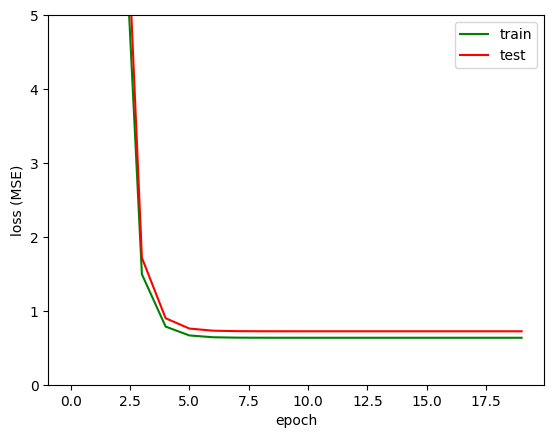

In [ ]:
#@title Script to learn from LR synthetic data, using mini batches, and train&test
# This example illustrates: gradient descent with PyTorch, train&test,  mini-batch
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.model_selection import train_test_split
torch.manual_seed(42)

B=10 # batch size
step_size = 0.1 # learning rate
iter=20 # number epochs

############################################ Creating synthetic data
# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1) # view converts to rank-2 tensor with one column
func = -5 * X + 2
# Adding Gaussian noise to the function f(X) and saving it in Y
y = func + 0.4 * torch.randn(X.size())

##################################### Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####################################################### Gradient Descent
# initial weights
coeffs=torch.tensor([-20.,-10.]).requires_grad_()

# defining the function for prediction (linear regression)
def calc_preds(x):
  return coeffs[0] + coeffs[1] * x

# Computing MSE loss for one batch of exemples
def calc_loss_from_labels(y_pred, y):
  return torch.mean((y_pred - y) ** 2)

# lists to store losses for each epoch
training_losses=[]; test_losses=[]

# epochs
for i in range(iter):
  # calculating loss as in the beginning of an epoch and storing it
    y_pred = calc_preds(X_train)
    training_losses.append(calc_loss_from_labels(y_pred, y_train).tolist())
    y_pred = calc_preds(X_test)
    test_losses.append(calc_loss_from_labels(y_pred, y_test).tolist())
    # mini-batch gradient descent: weight are updated after each batch
    for idx_start in np.arange(0,X_train.shape[0],B):
        # create batch
        batch_X=X_train[idx_start:(idx_start+B),:]
        batch_y=y_train[idx_start:(idx_start+B):]
        # making a prediction in forward pass
        y_pred = calc_preds(batch_X)
        # calculating the loss between predicted and actual values
        loss = calc_loss_from_labels(y_pred, batch_y)
        # compute gradient
        loss.backward()
        with torch.no_grad():
            # update coeffs
            coeffs.sub_(coeffs.grad * step_size)
            # zerofy gradients (because they add up)
            coeffs.grad.zero_()

print('batch size:', B)
print('coeffs found by gradient descent:',coeffs.detach().numpy())
# plot training and test losses along epochs
plt.plot(training_losses, '-g',  test_losses, '-r')
plt.gca().legend(('train','test'))
plt.ylim(0, 5)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')
plt.show()

High level packages like `fastai` alows us to very easily specify what is the proportion of examples which is kept aside for *testing* to prevent *overfitting* the parameters.  In general, data sets with $N$ examples is partitioned into a subset with, say $0.2 \times N$ examples for testing and $0.8 \times N$ examples for training like in the notebook  [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb):
    
    dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(192, method='crop')] # try crop instead of squish
    ).dataloaders(path)

where `RandomSplitter(valid_pct=0.2, seed=42)` indicates that 20% of the examples are used for testing.

The *training* data set is used to search for the optimal set of weights for the model, typically by iteratively updating the weights from a initial set of weights using *gradient descent* over the loss. The *test* data set is used to compute the same loss metric over an independent set of examples.

By comparing the training and test losses it is possible to assess issues in model behaviour like *high bias/underfitting*,  *high variance/overfitting*,  and *unrepresentativeness* of either training or validation set.

## Data preprocessing and data augmentation

Preprocessing tabular data will be discussed in the "Tabular data" section below.

Preprocessing images typically comes down to (1) resizing them to a particular size (2) normalizing the color channels (R,G,B) using a mean and standard deviation. These are referred to as image transformations.

In addition, one typically performs what is called data augmentation during training (like random cropping and flipping) to make the model more robust and achieve higher accuracy. Data augmentation is also a great technique to increase the size of the training data.

Image transformations can be achieved with *geometric image transformation*. This is the process of altering the geometric properties of an image, such as its shape, size, orientation, or position. It involves applying mathematical operations to the image pixels or coordinates to achieve the desired transformation.

Code and examples for data augmentation and transformation with PyTorch can be found in the documentation https://pytorch.org/vision/main/auto_examples/.

A typical code for data transformation for color image classification can be found below. It resizes the input image, possibly flips horizontally the image, and normalizes each of the image RGB channel.

```
transforms = v2.Compose([
    v2.RandomResizedCrop(size=(224, 224), antialias=True),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
out = transforms(img)

plot([img, out])
```

# Loss functions for classification (cross-entropy)

Classification problems have categorical labels. Therefore, the model predictions should return the most likely label for each example.

While in regression the model's output is typically an unbounded response variable (for instance, it is $f(x;a,b) = a\, x + b$ in simple linear regression), for classification problems, it is more convenient to have:
1. one output per label;
2. each output being a value between 0 and 1 that can be interpreted as the probability of the label.


<img src="https://drive.google.com/uc?export=view&id=1iD519g8QbBmOGp9SiOQsIneJnWg53SMQ" width="600" >

Therefore, it is usual to have a model that outputs scores $f_1({\rm \bf x};{\rm \bf w_1}), \dots , f_k({\rm \bf x};{\rm \bf w_k})$ for each of the $k$ possible labels, and an additional model component that converts those *raw* scores into probability-like values for the labels.

You saw that kind of probabilistic output when you trained and deployed an image classifier in notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb). When you did predict the label for a new example with

    is_bird,_,probs = learn.predict('bird.jpg')
    print(is_bird,probs)

you got a vector of estimated probabilities like the following:

    bird tensor([0.9980, 0.0020])    

where the values `0.9980, 0.0020` correspond, respectively, to labels *bird* and *forest*.




### Softmax



The unormalized model outputs $f_1, \dots, f_k$ are called *scores*, *logits* or *raw* outputs. Each score $z_i=f_i({\rm \bf x};{\rm \bf w_i})$ is converted into a [0,1] value by the *softmax* function:

$$p_i=\frac{\exp(z_i)}{\sum_{j=1}^k \exp(z_j)} ~~ {\rm which~implies~that} ~~ 0<p_i \le 1.$$

After that transformation, the classification model's probabilistic output is a vector of values $(p_1,\dots,p_k)$, with $p_i \ge 0$ and $\sum p_i=1$ as required for  probability distributions. The predicted label is the one with highest $p$.


### Comparing target and predicted probability distributions



While for *regression* the loss is a dissimilarity between the actual labels $y_1,\dots,y_n$ and the predicted labels $\hat{y}_1,\dots,\hat{y}_n$ for the set with $n$ examples, in *classification*  with *softmax* the loss is then a dissimilarity between the actual labels $y_1,\dots,y_n$ and the $n$ probability vectors $(p_1,\dots,p_k)_1, \dots, (p_1,\dots,p_k)_n$.

To compare vectors of the same dimension, one can express each target label $y_i$ as a probabilitity distribution with 0 uncertainty. Suppose that there are 3 different possible labels (as in the `iris` data set) and the actual label of the example is the first label: then, the *target distribution* would be $(1,0,0)$ which can be  compared with the model's output probability distribution $(p_1,p_2,p_3)$. This will be illustrated with an example below.




###Loss functions in fastai



A list of `fastai` loss functions is available in https://docs.fast.ai/losses.html. In general, they are simple adaptations of `pytorch` loss functions listed in https://pytorch.org/docs/stable/nn.html#loss-functions.  The most common *loss* function for classification is called *cross-entropy*.

Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) creates the learner with:

    learn = vision_learner(dls, resnet18, metrics=error_rate)

`vision_learner` allows to explicitely define the loss function  with the argument `loss_func`. Since it is not explicitely defined in the code above, we can check the default which is stored in property `loss_func`:

    learn.loss_func

which returns `FlattenedLoss of CrossEntropyLoss()`. This `fastai` loss is described in the Pytorch documentation as the `nn.CrossEntropyLoss` class  [https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html). Hence, the loss function that is applied in the example in the notebook is  `torch.nn.CrossEntropyLoss` that computes the cross entropy loss between input logits and target.



### Cross-entropy and one-hot encoding



So, what is the *loss* you see in the output when you train an image classifier in notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb)?

    epoch 	train_loss 	valid_loss 	error_rate 	time
    0 	    1.184412 	  1.291252 	  0.364865 	  00:03


Suppose that your model (`resnet18`) was trained to classify photos of birds and forests. The last layer of the model outputs *scores* $z_1=f_1(x_1,\dots,x_n), z_2=f_2(x_1,\dots,x_n)$, where $z_1$ is associated to *bird*, $z_2$ is associated to *forest*.

By default the loss is computed with *cross-entropy* which will allow to measure the dissimilarity between the *distribution* of scores with the target value, for all the examples in a batch of examples.

Consider an hypothetical case with 4 examples and 3 classes (i.e. 3 possible labels, as for the `iris`data set). Suppose that the output of the `predict` method for those 4 examples area the *scores* in the following 4$\times$3 tensor (rows are examples, columns are classes). Columns could for instance correspond to *setosa*, *versicolor* and *virginica*.

In [ ]:
import torch
scores=torch.tensor([[4.5,2.1,0.2],
                     [1.3,8.3,0.8],
                     [1.2,1.5,4.2],
                     [5.1,0.4,2.3]])

Looking at the tensor above, it looks like the first and fourth examples have a higher likelihood of being *setosa*, while the second example is more likely to be *versicolor* and the third one seems to be *virginica*. Let's apply *softmax* to convert the raw outputs into probability-like values.

In [ ]:
 softs = scores.softmax(dim=1)
 torch.set_printoptions(sci_mode=False)
 softs

tensor([[    0.9056,     0.0822,     0.0123],
        [    0.0009,     0.9985,     0.0006],
        [    0.0446,     0.0602,     0.8953],
        [    0.9347,     0.0085,     0.0568]])

It is clear that the softmax rule did amplify the difference in values for each example. In each row there is one value close to 1 and the remainder values are close to 0. For each example, *cross-entropy* compares the target distribution with the probability distribution returned by *softmax*.

Let's suppose that in fact, the first and last examples have actually label *setosa*, the second is actually *versicolor* and the third is actually *virginica*. Then the target distribution will be 1 for the correct label and 0 for the remaining labels. This is known as  *one-hot encoding* and it's illustrated by the rows of the following tensor (each row is one example):

In [ ]:
one_hot_target=torch.tensor([[1.,0.,0.],
                            [0.,1.,0.],
                            [0.,0.,1.],
                            [1.,0.,0.]])
standard_target=torch.tensor([0,1,2,0],dtype=torch.long)

Cross-entropy loss measures the dissimilarity between the probability distribution $(p_1,p_2,p_3)$ returned by *softmax* and the target distribution $(t_1,t_2,t_3)$ for the $i$-th example with the expression, and takes values between 0 (optimal value associated to minimum uncertainty) and 1 (maximum value associated to maximum uncertainty, i.e. all probabilities are equal):

$$L_i=-\left( t_1 \, \log(p_1) + t_2 \, \log(p_2) + t_3 \, \log(p_3) \right) \in [0,1].$$

In the expression above, we suppose that the probabilities are non zero.
For the whole batch of $n$ examples, the cross-entropy loss is given by the average of the $n$ individual loss values:

$$L=\frac{1}{n} \left( L_1+L_2+ \dots,L_n\right).$$

This can be computed with `nn.CrossEntropyLoss()` directly from the *scores* and *target* values as shown below:

In [ ]:
#! pip install torch -U
import torch.nn as nn
# compute loss
loss = nn.CrossEntropyLoss()
output = loss(scores, one_hot_target)
print('Cross Entropy Loss: ', output)
# or, simply
output = loss(scores, standard_target)
print('Cross Entropy Loss: ', output)

Cross Entropy Loss:  tensor(0.0697)
Cross Entropy Loss:  tensor(0.0697)


# Assessing ML performance

## Error rate and accuracy

Notebook [Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb](Lesson1_00_is_it_a_bird_creating_a_model_from_your_own_data.ipynb) uses  `error_rate` when creating the `learner`:

    learn = vision_learner(dls, resnet18, metrics=error_rate)
    learn.fine_tune(3)

where `dls` is a `DataLoaders` object with the input data, `resnet18` is a deep CNN model. The argument `metrics=error_rate` indicates that the overall performance of the algorithm is measured proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$. A very similar metric is `accuracy` which is simply `1-error_rate`.

When one trains a classifier in `fastai`, the output for the training epochs looks like

<img src="https://drive.google.com/uc?export=view&id=1PJ36nJ-Isu-LThJTFwRj7XwVY5qWeRfJ" width="300" >

One could wonder how the  `error_rate` is computed when the data set is divided into *training* and *test* sets (as mentioned earlier, the test set is also called a *development set* of examples). In `fastai`, because the training set and test set are integrated into a single class (`dataloaders`),  by default the metrics displayed during training (as in the output above) use the test set, so the `error_rate`is computed over the validation set.

At this point it should be clear what `epoch`, `train_loss`, `valid_loss` and `error_rate` in the above training output are:
1. `epoch`: number of times that the whole set of examples has been used for prediction;
2. `train_loss`: the value of the loss function computed with the model weights for that epoch and the training examples;
3. `valid_loss`: the value of the loss function computed with the model weights for that epoch and the validation examples;
4. `error_rate`: proportion of mismatches between the set of actual labels $y_1, \dots , y_n$ and the set of predicted labels $\hat{y}_1, \dots , \hat{y}_n$ computed with the model weights for that epoch and the validation examples.

There are many metrics other than `error_rate` for measuring the performance of *regression* and *classification* problems. For instance, `scikit-learn` provides the metrics listed in
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics. The package `fastai`  includes  all metrics from `scikit-learn` and some additional ones. The documentation is available at https://docs.fast.ai/metrics.html.




## Confusion matrix (error matrix)

The confusion matrix, also called error matrix, is a very useful tool to evaluate the precision of a classifier.

To compute the error matrix for a classifier ${\bf f_{\bf w}}({\bf x})$ trained with a given training set of examples, the steps are the following.

1. Consider a test set of examples $({\bf x}, y)$ that were not used for training;

2. Predict the labels $\hat{y}={\bf f_{\bf w}}({\bf x})$ for all examples in the test set;

3. Compare the predicted labels $\hat{y}$ with the true labels $y$ and create a two-way table where the rows represent the actual labels ($y$)  and the columns represent the predicted labels $\hat{y}$.

### How to calculate and interpret a confusion matrix

The following code illustrated how to compute a confusion matrix for a classification task with two classes, labeled 0 and 1, and plot the result with `matplotlib´.

The matrix compares the true labels of the examples `y_true` with the labels predicted by the classifier `y_pred`

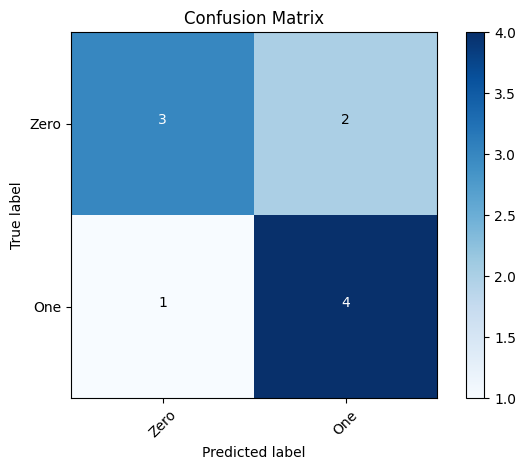

In [ ]:
#@title Script that computes a confusion metrics from lists of predicted and actual labels
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt # to plot
# Actual labels
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])
# Predicted labels
y_pred = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1])
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Define class labels
classes = ['Zero', 'One']
# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
# Fill in confusion matrix with values
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
plt.tight_layout()
plt.show()


### Accuracy metrics derived from the confusion matrix

In general, if there are $n$ different label values, the error matrix is $n \times n$. For simplicity, let's just consider the $2 \times 2$ error matrix, where correct predictions are called TP or TN, and the errors FP or FN.

|           | Predicted Positive | Predicted Negative |
|-----------|--------------------|--------------------|
| Actual Positive | TP=True Positive     | FN=False Negative    |
| Actual Negative | FP=False Positive| TN=True Negative|

The following metrics are computed from the error matrix:

---

1. Classification **accuracy**.

$${\rm accuracy}=\frac{{\rm TP}+{\rm TN}}{{\rm TP}+{\rm FN}+{\rm FP}+{\rm TN}}.$$

If the number of actual positive examples (TP+FN) is very different from the number of negative examples (FP+TN), the largest number is going to dominate the result. For instance, is 5% of some area is burned, but the classifier just labels all pixels as non-burned, the classification accuracy will be 95%.

For that example, the error matrix will look something that the following one.


|           | Predicted Burned | Predicted Non burned |
|-----------|--------------------|--------------------|
| Actual Burned | TP=0   | FN=50    |
| Actual Non burned | FP=0| TN=9050|

---

2. **Precision**, focused on predicted positives

$${\rm precision}=\frac{{\rm TP}}{{\rm TP}+{\rm FP}}.$$

This metric focusses only on the positive examples. For the burned area example above, the precision is not defined since no predictions are positive. Consider this other example, where one aims af finding greenhouses in a certain region.


|           | Predicted Greenhouse | Predicted Other |
|-----------|--------------------|--------------------|
| Actual Greenhouse | TP=80   | FN=20    |
| Actual Other  | FP=10| TN=9090|

In that case, precision is $80/(80+10) \approx 89\%$, while overall classification accuracy is $91.7\%$.

Precision is the complement of **commission error**:

$${\rm CE}=\frac{{\rm FP}}{{\rm TP}+{\rm FP}}.$$

---

3. **Recall**, focused on actual positives, and also called **sensitivity** or **true positive rate (TPR)**

$${\rm recall}=\frac{{\rm TP}}{{\rm TP}+{\rm FN}}.$$

The denominator here is the total number of actual positives. This is an interesting metric if we are focused on having a very low error on missing an actual positive (a typical example is missing a tumor in medecine).

For the burned area example, the classifier has the worst possible outcome since it misses all actual positives, and therefore its ${\rm recall}=0\%$. However, a similarly arbitrary classifier that would just predict the *positive* label for all examples would have a perfect ${\rm recall}=100\%$. For the greenhouse example, we have ${\rm recall}=80\%$.

Recall is the complement of **omission error**:

$${\rm OE}=\frac{{\rm FN}}{{\rm TP}+{\rm FN}}.$$

For instance, one wants the *sensitivity* of a disease test to be high to ensure that sick people are detected.

---

4. **Specificity**, is focused on actual negatives, and is also called **true negative rate (TNR)**

$${\rm specificity}=\frac{{\rm TN}}{{\rm TN}+{\rm FP}}.$$

For instance, one wants the *specificity* of a disease test to be high to prevent healthy people from being labeled as sick.

---

5. **F1 score**, which averages equally *precision* and *recall*

$${\rm F1~score}= 2 \times \frac{{\rm precision} \times {\rm recall}}{{\rm precision} + {\rm recall}}=\frac{{\rm 2\, TP}}{{\rm 2\, TP}+{\rm FP}+{\rm FN}}.$$

This is also known as the **Dice coefficient**. For the burned area example ${\rm F1~score}=0$ since in fact the F1 score is the *harmonic mean* of precision and recall. This metric still does not take into consideration true negatives (TN) and is criticized for giving the same importance to precision and recall.

---




`scikit-learn` offers a function that outputs a **classification report** that includes precision, recall and F1 score, for both possible labelings of the examples.

In [ ]:
#@title Script that computes a classification report from lists of predicted and actual labels
from sklearn.metrics import classification_report
import numpy as np
# Actual labels
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0])
# Predicted labels
y_pred = np.array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])
# Compute confusion matrix
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.57      0.80      0.67         5

    accuracy                           0.69        13
   macro avg       0.70      0.71      0.69        13
weighted avg       0.73      0.69      0.70        13



The output above illustrates the fact that *positive* or *negative* are not interchangeable. Since true negatives are not used to compute *precision* and *recall*, accuracy measures are not invariant with respect to labeling.

### Create a confusion matrix with `fastai`

In [Lesson2_edited_book_02_production.ipynb](Lesson2_edited_book_02_production.ipynb), to understand in detail which  mistakes the model is making,  a confusion matrix (also called an *error matrix*) was created with

    interp = ClassificationInterpretation.from_learner(learn)

    interp.plot_confusion_matrix()

which output was:

<img src="https://drive.google.com/uc?export=view&id=1zsTJ7wh6KneWG7_QuXijy5LDlJiu3K-F" width="300" >


The comment in the notebook for this figure is the following: The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. *It is (of course!) calculated using the validation set*.


## Cross-validation

When assessing accuracy is used to tune the model hyper-parameters, one should not rely solely on the training set to avoid overfitting. This means that three different sets of examples must be considered:

1.  *training* data set is used to search for the optimal set of weights for the model, typically by iteratively updating the weights from a initial set of weights using *gradient descent* over the loss.
2.  *validation* data set is used to compute the same loss metric over an independent set of examples.
3. *test* set to evaluate the performance of the classifier.

However, by partitioning the available data into three sets, we drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets (see https://scikit-learn.org/stable/modules/cross_validation.html)

A solution to this problem is a procedure called **cross-validation** (CV for short. A test set should still be held out for final evaluation, but the validation set is no longer needed when doing CV. In the basic approach, called $k$-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

* A model is trained using $k-1$ of the folds as training data;

* The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by $k$-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500" >

The following code uses `scikit-learn` to fit a multi layer perceptron (MLP) to classify the `iris` data set.  To implement *cross-validation*, the code relies on `cross_val_score`

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
X, y = datasets.load_iris(return_X_y=True)
# uses cross-entropy as loss function
clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5, 3), max_iter=1000,learning_rate_init=0.01,momentum=0.9)
clf.fit(X, y)
scores = cross_val_score(clf, X, y, cv=5,scoring='accuracy')
print(scores.mean(), scores.std())

0.72 0.3166491223210111


To obtain *cross-validation* predicted values, one can use `cross_val_predict` as in the following example.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(clf, X, y, cv=5)
confusion_matrix(y,y_pred)

array([[40,  0, 10],
       [ 0, 34, 16],
       [ 0,  0, 50]])

## Searching the best set of hyperparameters

Library `scikit-learn` provides `GridSearchCV` which allows to compute cross validation estimation of the performance of the model using combinations of hyperparameter values. The combination that leads to the best score is returned as the `best_params_` property.

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
iris = datasets.load_iris()
model = MLPClassifier(solver='adam',hidden_layer_sizes=(10, 5, 3), max_iter=1000,learning_rate_init=0.01,momentum=0.9)
model = MLPClassifier(hidden_layer_sizes=(10, 5, 3), max_iter=1000)
parameters = {'solver': ['sgd','adam'], 'learning_rate_init':[0.001,0.01], 'momentum':[0.8,0.9]}
clf = GridSearchCV(model, parameters)
clf.fit(iris.data, iris.target)
# best set of parameters
print(clf.best_params_)
# average over CV folds of test scores
print(clf.cv_results_['mean_test_score'])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perce

{'learning_rate_init': 0.001, 'momentum': 0.8, 'solver': 'adam'}
[0.71333333 0.98666667 0.72       0.82       0.75333333 0.6
 0.84       0.84666667]


An alternative to `GridSearchCV` is `RandomSearchCV`. In the example below, the classification model is a Random Forest (to be discussed later).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()
# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create a RandomizedSearchCV instance
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
# Perform the random search
random_search.fit(X_train, y_train)
# Get the best hyperparameters and model
best_params = random_search.best_params_
print(best_params)
best_model = random_search.best_estimator_  # retrieve the best model
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)
# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)

{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Model Accuracy: 1.0


## ROC curve and AUC

In case of binary classification, we can focus on the probability of the positive class. The usual threshold for prediction is 50% but there is no *a priori* reason to choose that threshold.

Therefore, we can change this threshold value of 50%. For instance, if the threshold is set as 70%, the model predicts an observation as positive only if the predicted probability is greater than 70%. Adjusting the threshold value changes some of the predicted labels and the overall performance of the classifier. Usually, a high threshold makes the prediction of the positive class less likely. This tends to increase both the false positive rate (FPR) and the true positive rate (TPR).

ROC curves typically feature true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis. This means that the top left corner of the plot is the “ideal” point - a FPR of zero, and a TPR of one (https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/220px-Roc_curve.svg.png" width="400" >
<img src="https://miro.medium.com/v2/resize:fit:702/format:webp/0*pF07ZmzBqbvkvqJO.png" width="400" >

The **AUC** is the area under the ROC curve. Its maximum value is 1, when the classifier is optimal. The *AUC* does not depend on the classification threshold, since it integrates all thresholds.

The following code shows how to compute AUC directly from the estimated classification probabilities. For instance, probabilities could be the output of a NN with a *softmax* output layer.

In [ ]:
from sklearn.metrics import roc_auc_score
# Assuming you have predicted probabilities or scores for the positive class
y_true = [0, 1, 1, 0, 1]
y_scores = [0.2, 0.8, 0.6, 0.3, 0.9]
# Compute the AUC score
auc_score = roc_auc_score(y_true, y_scores)
print("AUC:", auc_score)


AUC: 1.0


The following code draws the ROC curve and estimates the AUC for a two class problem (`iris` data set restricted to the most similar classes *versicolor* and *virginica*) using a MLP classifier and 6-fold cross-validation stratified by class.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


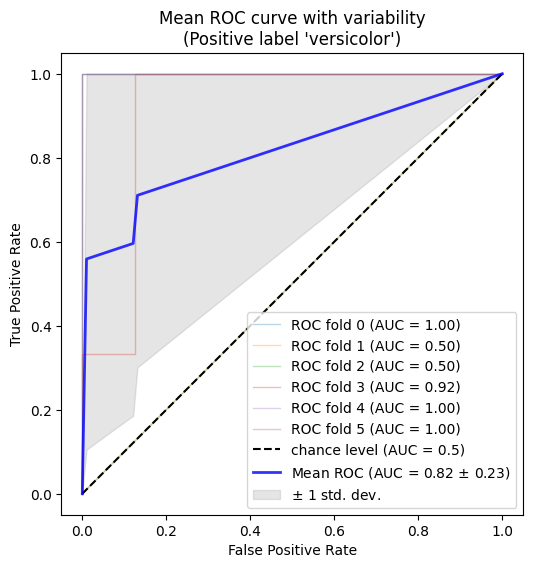

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
X, y = X[y != 0], y[y != 0] # drop the 'setosa' class
n_samples, n_features = X.shape

cv = StratifiedKFold(n_splits=6)
clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5, 2), max_iter=300,learning_rate_init=0.01,momentum=0.9)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100) # threshold to be considered to draw the ROC curve

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test],
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title=f"Mean ROC curve with variability\n(Positive label '{target_names[1]}')",
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()



# Some models for ML

## Tabular data

Simple linear regression and quadratic regression have *scalar* inputs, i.e. each example was described by a single number.

Examples can also be tabular data, where each example is described by a numeric vector. Formally, the $i$-th example is described by a vector  $(x_{i1}, \dots, x_{ik})$ of length $k$, for examples $i = 1, \dots, n$ and labels are $y_1, \dots,  y_n$  as before.

One example of data organized in a nummerical table are the [Wine quality data set](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset) available n Kaggle. It has 12 explanatory variables and the label is the wine quality.

    Input variables (based on physicochemical tests):\
    1 - fixed acidity
    2 - volatile acidity
    3 - citric acid
    4 - residual sugar
    5 - chlorides
    6 - free sulfur dioxide
    7 - total sulfur dioxide
    8 - density
    9 - pH
    10 - sulphates
    11 - alcohol
    Output variable (based on sensory data):
    12 - quality (score between 0 and 10)

But tables can also have non-numerical (text) columns like (https://www.kaggle.com/datasets/zsinghrahulk/covertype-forest-cover-types)




### Decision trees

All possible examples lie on a multi-dimensional region $R$ which is the feature space. Any classifier determines a partition of $R$ into regions $R_1,\dots,R_c$, where $R_j$ is the decision region for the $j$th class.

A binary **decision tree** represents $R$ as a tree, where the *root node* represents the whole of $R$. Each node can be split into two new subnodes. The nodes that are not split are called *leaf nodes*. A class label is assigned to each *leaf node* to determine the classifier.

#### First example



The example below shows a decision tree for the `iris` data set. The root node represents the 4-dimensional space defined by the variables `sepal length`,`sepal width`, `petal length`, `petal width`. This is a 3-class problem where labels are the varieties `setosa`, `versicolor`, `virginica`.

We call **depth** of the decision tree to the maximum number of splits to define a leaf node. Note that the code establishes `max_depth=4` to prevent the tree from growing more than 4 levels. The figure indicates the number of examples (or training samples) that lie in each node of the tree.

 labels:  ['setosa' 'versicolor' 'virginica']


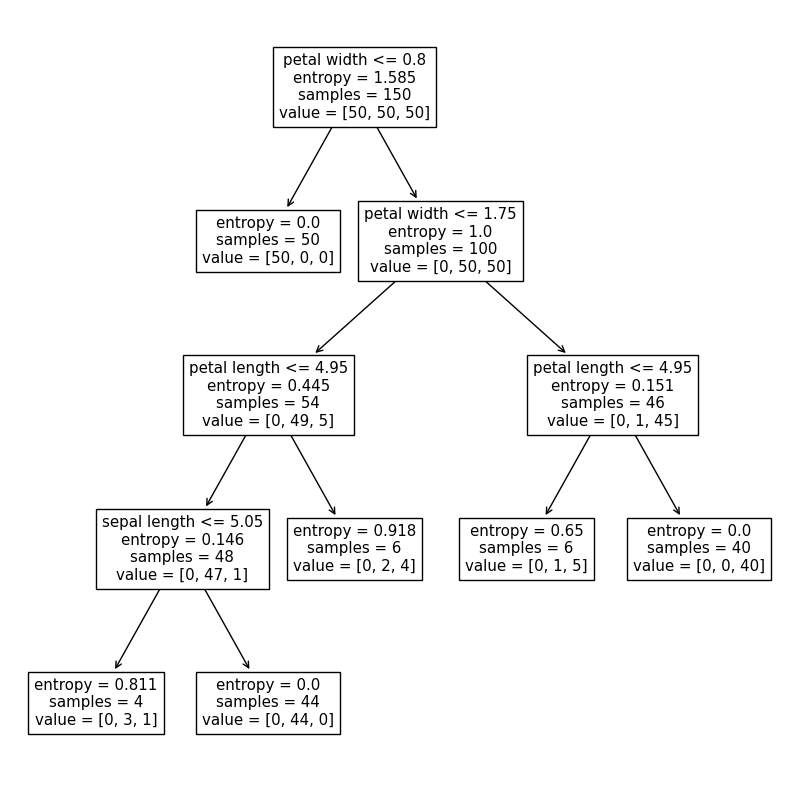

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
iris = load_iris()

X = iris.data
y = iris.target
print(' labels: ', iris.target_names)

#build decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node

#fit the tree to iris dataset
clf.fit(X,y)

#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10)) #figsize value changes the size of plot
tree.plot_tree(clf,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

#### Impurity and loss

To build a tree, several questions arise:
1. Which feature should be tested at a node?
2. When should a node be declared a *leaf*?
3. If the tree becomes 'too large' how can it be made smaller and simpler (pruning)?
4. If a leaf node is impure, how should the category label be assigned?
5. How should be missing data handled?



To answer to those questions, we first need to define a measure of the quality of the model. As before, one defines a *loss* for a decision tree since the  ultimate goal is to find the model with the lowest loss.

There are two types of decision trees in ML:
1. **Classification trees**, where the labels are categorial as in the `iris`data set example. In that case, the **predicted** label is the most frequent label in the examples that lie the leaf node. For instance, if there are $[0,3,1]$ samples of varieties `[setosa, versicolor, virginica]` in a leaf node, then the label of the leaf node is `versicolor` and this is the predicted label $\hat{y}$ for all examples that lie in that region. To compute the *loss* one relies on the distribution of labels in the leaf node. For instance, the node with $[0,3,1]$ examples has estimated probabilities $\hat{p}_1=0$,  $\hat{p}_2=0.75$, $\hat{p}_3=0.25$ of been assigned to each one of the classes.
2. **Regression trees**, where the labels are continuous. In that case, the label for the node is the mean of all labels of examples that lie in that node, i.e. $\hat{y}=\bar{y}$. The *loss* for the $i$th example is then the dissimilarity between $\bar{y}$ and $y_i$. For *regression trees* the usual *loss* functions  are `mse`and `mae`.


Let's see how the *loss* of a classification tree is computed in general and of a split in particular is computed. The loss is related to the impurity of the leaf nodes of the tree. The highest is the impurity of the leaf nodes, the largest is the classification uncertainty and the loss.

For any given node of the tree, with $n_1,n_2,\dots,n_c$ examples of each class, the estimated probabilities for the $c$ different labels are:

$$\hat{p_1}=\frac{n_1}{n},\dots,\hat{p_c}=\frac{n_c}{n},$$

where $n$ is the total number of examples at the node. For classification trees, the `DecisionTreeClassifier` class in `scikit-learn` uses one of the following criteria:

1. `gini`: This is the default criterion and it measures the impurity of a set of samples as the probability of misclassifying a randomly chosen element from the set. The *loss* is given by  $G = 1 - \sum_{i=1}^n p_i^2$, where $\hat{p}_i$ is the estimated probability of belonging to the $i$th class.
2. `entropy`: This criterion measures the impurity of a set of samples as the amount of information gained about the label from observing the features that define the node. The *loss* is given by $E=-\sum_{i=1}^n \hat{p}_i \log_2 \hat{p}_i$.

Both measures range from 0 (minimum impurity, maximum certainty) to some maximum value (maximum impurity, minimum certainty). For instance, for a 2-class problem, maximum impurity is reached when $p_1=p_2=0.5$, where

$$G=1-0.5=0.5 {\rm ~and ~~} E= - 2 \times (0.5 \, \log_2 0.5)= - 2 \times (-0.5)=1.$$

When the node is split into two new children nodes, the loss function is calculated separately for each subset resulting from the split, and the *total loss* is the weighted sum of the losses of the subsets, where the weights are the fractions of samples in each subset. The split with the lowest total loss (i.e., the greatest reduction in entropy) is chosen as the best split. The expression for the loss of a split is the following, where $L$ can be either the entropy $E$ or the Gini criterion $G$.

$$
 L = \frac{n_{\rm left}}{n} \times L_{\rm left} + \frac{n_{\rm right}}{n} \times L_{\rm right} ~~~~~~~~~(1)$$

The rules above allow us to compute the loss for any tree computed from the data set. For each new split, Equation 1 allows us to update the *loss* of the whole tree.

For the two loss function above (`entropy` and `gini`), it is guaranteed that the *total loss* of the tree cannot increase for any possible split. Therefore, there is always a reduction (strict or not) in *loss*  resulting from a split which is also called *information gain*.




#### Choosing the possible splits

For continuous explanatory variables, all $n$ examples are ordered for the  $j$th feature:

$$x_{j(1)} \le x_{j(2)} \dots \le  x_{j(n)}.$$

Hence, it is not necessary to test more than $n$ splits for each feature $j$. The spliting algorithm is just something like below.

---
Initialize $L$ as an empty list

For $j=1,\dots,k$

$~~~~$ For $ i = 1, \dots n$,

$~~~~$ $~~~~$ Consider the split $x_j \le x_{j(i)}$, compute its loss decrease and append it to $L$.

The best split is the split $x_j \le x_{j(i)}$ which has the lowest value in $L$.

----

For categorical explanatory variables, when there is no order along values, in principle all $2^m$ combinations of the $m$ distinct values that the variable can take should be considered as possible splits.

#### Regularization and pruning

Decision trees are prone to *overfitting* since that if they grow enough they can approximate any decison rule with arbitrary precision. Therefore, there are different techniques to prevent decision trees of being  too large.

1. Criterion to stop growing the tree, which is equivalent to decide when a node should not be splited and should become a leaf node. There are three standard hyper-parameters:
  - Maximum depth of the tree (e.g. 4);
  - Minimum leaf size, i.e., minimum number of examples that lie in a leaf (e.g. 3);
  - Maximum number of nodes (e.g. 20).

2. Pruning. This is a regularization technique that consists on pruning the full grown tree to reduce its size. Pruning can be achieved by:
  - Adding a regularization hyper-parameter to the loss function, like $\alpha(|T|)$ where $\alpha$ is a function of the size (number of leaves) of the tree $T$. If one uses $L_\alpha=L+\alpha$ (consider that $\alpha >0$) instead of $L$ to determine the *loss*, then spliting a node might possibly cause an increase of $L_\alpha$.  If two leaves are pure and have the same label, aggregating them will lower $L_\alpha$ for $\alpha>0$. Pruning aggregates leaf nodes if that reduces $L_\alpha$.
  - Predicting a validation data set with the decision tree. Pruning consists of aggregating leaf nodes if that aggregation increases validation accuracy.

The script below illustrates how a regularization parameter like $\alpha$ can be adjusted when fitting a decision tree (suggestion: try with a different data set).

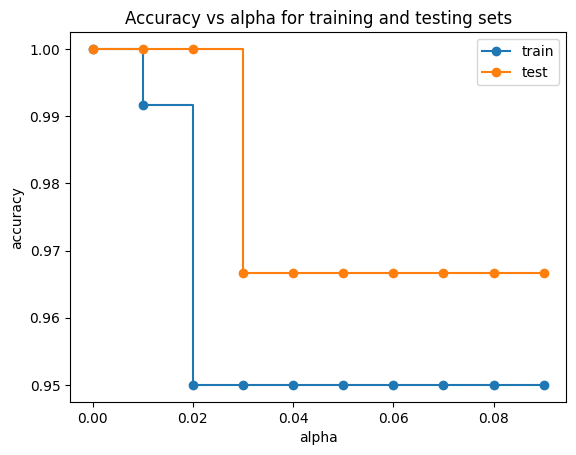

In [ ]:
from sklearn.datasets import load_iris,load_wine,load_digits,fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# load the iris dataset
dataset = load_iris() #fetch_olivetti_faces() #load_digits() #load_wine() #

# split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2, random_state=42)

# create a decision tree classifier
#tree = DecisionTreeClassifier()

alphas=[k/100 for k in range(10)]
trees=[]
# fit tree for each alpha
for alpha in alphas:
  # create decision tree with a cost complexity parameter alpha
  tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
  # fit
  tree.fit(X_train, y_train)
  # append tree to trees
  trees.append(tree)

# compute accuracies
train_scores = [clf.score(X_train, y_train) for clf in trees]
test_scores = [clf.score(X_test, y_test) for clf in trees]

# plot accuracy vs alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


#### Decision tree bias and variance

**Bias** measures how much the predictions of a model differ from the true values. **Variance** measures how much the predictions of a model differ from each other. One possible technique to estimate  bias and variance is **cross-validation**.

In general, cross-validation is a technique used to evaluate the performance of a machine learning model. It involves splitting the dataset into multiple subsets, training the model on some of them, and testing it on the remaining subsets. This allows us to estimate the performance of the model on new, unseen data.

The code below relies on `validation_curve`from `scikit-learn` to estimate bias and variance of a classification model. In fact, the code applies a family of models (decision trees) that depend on the hyper-parameter `max_depth`.  Note that the synthetic data set is generated by `make_classification`.


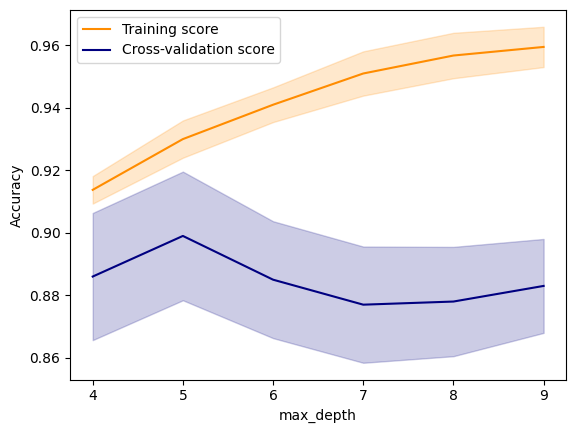

Bias: [0.012996 0.010201 0.013225 0.015129 0.014884 0.013689]
Variance: [0.000414 0.000424 0.00035  0.000346 0.000306 0.000226]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

# generate a toy dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42,n_classes=2)

# define the model
model = tree.DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4)

# define the range of hyperparameters to test
param_range = np.arange(4, 10)

# use validation_curve to compute training and validation scores for different hyperparameters
train_scores, test_scores = validation_curve(
    model, X, y,
    param_name="max_depth", param_range=param_range,
    cv=5,
    scoring="accuracy")

# calculate the mean and standard deviation of the training and validation scores for each hyperparameter
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plot the validation curves
plt.plot(param_range, train_mean, label="Training score", color="darkorange")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="navy")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

# calculate bias and variance
bias = (1 - test_mean) ** 2
variance = test_std ** 2

print("Bias:", bias)
print("Variance:", variance)


In the example above, *bias* and *variance* are estimated from the validation scores. For instance, for the model with `max_depth=4`, the estimated bias is $\approx 0.013$, which corresponds to an estimated 87% accuracy, while the estimated variance is $\approx 0.0004$, which is the plotted standard deviation ($\approx 0.02$) squared.

Suggestion: try the code above using the `gini` instead of the `entropy` criterion for spliting.

### Ensemble methods

#### Random forests

Random forests (RF) are an ensemble learning method that involves:
  - (bootstraping) Creating a collection of decison trees from bootstrap samples (sampling with replacement);
  - (decorrelating) Decorrelate models by randomly selecting features
  - (aggregating) Ensembling the collection of trees by majority vote.


<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/0*qSZ93ucUL8gpZ3jf.png" width="800" >

The goal of ensemble decision trees with random forests is to reduce the variance. This is illustrated below for  regression trees. The idea for classification trees is similar but the mathematics are more complicated.

Let  $X_i$ be  the random variable  that represents the predition for the regression tree $T_i$ from the collection, with $\rho={\rm cor}[X_i,X_j]$ being the correlation between $X_i$ and $X_j$. The prediction from the ensemble is

$$ \bar{X} = \frac{1}{B} \left( X_1+\dots+X_B \right)$$

and its variance is given by

$${\rm Var}[\bar{X}]=  \rho \, \sigma^2 + \frac{1-\rho}{B} \sigma^2,$$

where ${\rm Var}[X_i]=\sigma^2$ and $B$ is the number of bootstrap samples. As long as $\rho$ does not grow with $B$, using a larger ensemble will increase $B$ and reduce ${\rm Var}[\bar{X}]$, which is the goal of ensembling classifiers.

Therefore, the idea of **bootstrap aggregation**, aka **bagging** is to create an ensemble of low correlated tree models (bootstrap) followed by aggregation in order to reduce the variance of the predictions.

Example of script that creates and fits a RF classifier for a classification problem on the `iris` data set.

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# load the iris dataset
dataset = load_wine() #

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.2)
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9444444444444444


#### AdaBoost

As discussed in [CHECK LINK(Sagi and Rokach, 2017)](docs/Sagi_2018_Ensemble_learning_A_survey_Wire.pdf), the
main idea of AdaBoost is to focus on instances that were previously misclassified when training a new inducer. The
level of focus given is determined by a **weight** that is assigned to each instance in the training set. In the first iteration,
the same weight is assigned to all of the instances. In each iteration, the weights of misclassified instances are increased,
while the weights of correctly classified instances are decreased. In addition, weights are also assigned to the individual
base learners based on their overall predictive performance.

**AdaBoost** is a *dependent* ML method since each tree is an improvement over previous trees in the sequence. This is the opposite of *random forests* where the tree are grown independently.

#### Gradient Boosting

Gradient Boost is also a *dependent* method, since each tree is an improvement of the earlier trees. Gradient Boost provides a framework to build an ensemble of trees based on an arbitrary loss function. In Gradient Boosting, each new tree is computed using a **simple classifier** (also called weak inducer, that just performs better than random) the **residuals** from the previous model.

For details and very nice illustrations, look at the two following posts:

1. [Regression](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502)

2. [Classification](https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-2-classification-d3ed8f56541e)

#### Variable importance

From [(Scornet, 2021)](https://arxiv.org/pdf/2001.04295.pdf):

Since interpretability is a concept difficult to define precisely, people eager to gain
insights about the driving forces at work behind random forests predictions often focus
on variable importance, a measure of the influence of each input variable to predict
the output. In Breiman’s [2001] original random forests, there exist two importance
measures:

1. **Mean Decrease Impurity** [MDI, or Gini importance, see Breiman, 2002],
which sums up the gain associated to all splits performed along a given variable; and

2. **Mean Decrease Accuracy** [MDA, or **permutation importance**, see Breiman, 2001]
which shuffles entries of a specific variable in the test data set and computes the
difference between the error on the permuted test set and the original test set.

Because
of its very definition, MDI is an importance measure that can be computed for trees
only, since it strongly relies on the tree structure, whereas MDA is an instantiation of
the permutation importance that can be used for any predictive model. Both measures
are used in practice even if they possess several major drawbacks

**MDI** is known to favor variables with many categories [see, e.g., Strobl et al.,
2007, Nicodemus, 2011]. Even when variables have the same number of categories,
MDI exhibits empirical bias towards variables that possess a category having a high frequency [Nicodemus, 2011, Boulesteix et al., 2011]. MDI is also biased in presence of correlated features [Nicodemus and Malley, 2009].

On the other hand, **MDA** seems to exhibit less bias than MDI but tends to overestimate correlated features Strobl et al. [2008]. Besides, its scale version [the default version in the R package randomForest, Liaw and Wiener, 2002] depends on the sample size and on the number of trees, the last being an arbitrary chosen parameter [Strobl and Zeileis, 2008]. The interested reader may refer to Genuer et al. [2008] and Genuer et al. [2010] for an extensive simulation study about the influence of the number of observations, variables, and trees on MDA together with the impact of correlation on this importance measure.


The following code show how to compute MDI with different ensemble methods, and compares the estimated importances for the `iris`data set explanatory variables.

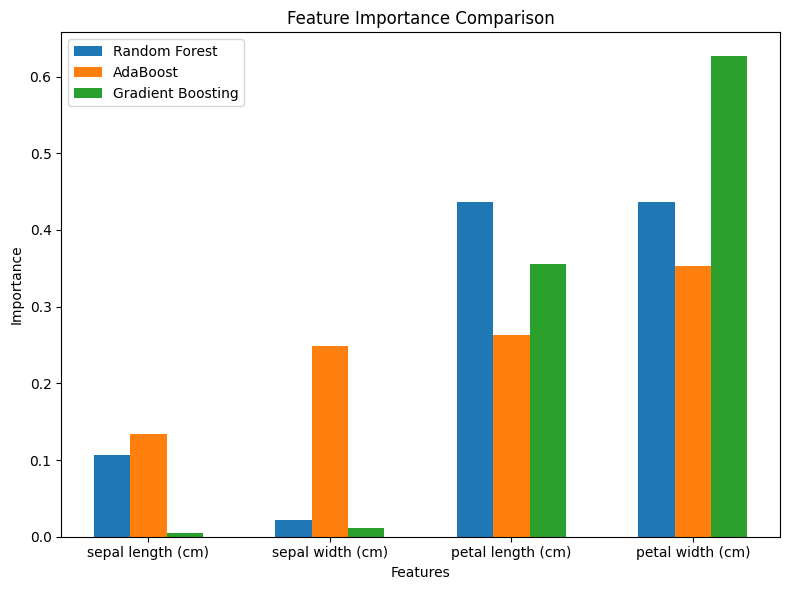

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Create Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)

# Create AdaBoost classifier with decision tree base estimator
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3), random_state=42)
ada_clf.fit(X, y)

# Create Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X, y)

# Calculate feature importance for each classifier
rf_importance = rf_clf.feature_importances_
ada_importance = ada_clf.feature_importances_
gb_importance = gb_clf.feature_importances_

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the feature importance
x = np.arange(len(feature_names))
width = 0.2

rects1 = ax.bar(x - width, rf_importance, width, label='Random Forest')
rects2 = ax.bar(x, ada_importance, width, label='AdaBoost')
rects3 = ax.bar(x + width, gb_importance, width, label='Gradient Boosting')

# Add labels, title, and legend
ax.set_xlabel('Features')
ax.set_ylabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(feature_names)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

`scikit-learn` also provides functions to compute MDA (permutation importance). This measure of importance can be computed for any classification method but it is more computationally demanding since data have to be classified after each variable is shuffled, while MDI just uses the losses (or gains) that are computed while training the classifier.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


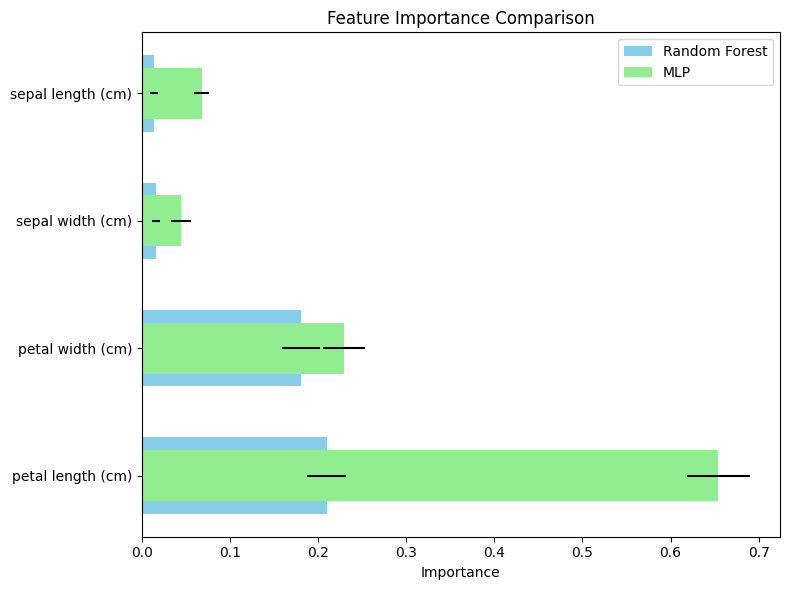

In [ ]:
from sklearn.datasets import load_iris
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = load_iris()
target_names = iris.target_names
X, y = iris.data, iris.target
feature_names = iris.feature_names

# models
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X, y)
mlp_clf = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5, 2), max_iter=300,learning_rate_init=0.01,momentum=0.9)
mlp_clf.fit(X, y)

# extract permutation importance
result_rf = permutation_importance(rf_clf, X, y,n_repeats=10)
result_mlp = permutation_importance(mlp_clf, X, y,n_repeats=10)

# Sort the importances in descending order
sorted_importances_idx = result_rf.importances_mean.argsort()[::-1]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(np.arange(len(feature_names)), result_rf.importances_mean[sorted_importances_idx], xerr=result_rf.importances_std[sorted_importances_idx], height=0.6, color='skyblue', label='Random Forest')
ax.barh(np.arange(len(feature_names)), result_mlp.importances_mean[sorted_importances_idx], xerr=result_mlp.importances_std[sorted_importances_idx], height=0.4, color='lightgreen', label='MLP')

ax.set_yticks(np.arange(len(feature_names)))
ax.set_yticklabels(np.array(feature_names)[sorted_importances_idx])
ax.set_xlabel('Importance')
ax.set_title('Feature Importance Comparison')
ax.legend()

plt.tight_layout()
plt.show()

### Perceptron

The *perceptron* is one of the simplest models for numerical tabular data and 0/1 classification problems and has been already discussed earlier. Since it is the basis for neural networks, we review below its formalism.

<img src="https://drive.google.com/uc?export=view&id=1HqHfJn7ejJMGeAa5fTTQzW_myubIDsDh" width="600" >


The model is

$$f_{\rm \bf w}(x_1,\dots,x_k)= \sigma (w_1 \, x_1 + \dots + w_k \, x_k)$$

where $\sigma(.)$ is the activation function, and it is defined by

$$\sigma(z) = \left\{\begin{align}
1 &, &  z \ge t \\
0 &, &  z < t \\
\end{align} \right.$$

where $t$ is some *threshold*.


Here, we consider that the input data as already been pre-processed, and all explanatory variables $(x_{i1},\dots,x_{ik})$ are numerical, while the response variable is $y_i \in \{0,1\}$ for $n$ examples $i=1,\dots,n$. In practice, pre-processing is usually necessary to create the numerical inputs of the neural network.

In matrix form, each row represents one example. For $n$ examples $i=1,\dots,n$, the following matrices represent the examples and the labels.

$
	{\rm \bf X}= \begin{bmatrix}
	x_{11} & \dots & x_{1k} \\
	x_{21} & \dots & x_{2k} \\
	\dots & \dots & \dots\\
	x_{n1} & \dots & x_{nk} \\
	\end{bmatrix}~~~~~~
$
$
	{\rm \bf y}= \begin{bmatrix}
	y_1  \\
	y_2  \\
	\dots \\
	y_n  \\
	\end{bmatrix}
$

Since each example corresponds to a row of ${\rm \bf X}$, the $i$-th example is  $(x_{i1},\dots,x_{ik})$
and has label $y_i \in \{0,1\}$.

Although in the original medel of the Perceptron, the activation function was a step functon (see above), it is currently more common to use a continuous functions for $\sigma(.)$. A typical  candidate is the *sigmoid* function

$$\sigma(z)= \frac{1}{1+e^{-z}}$$

that ranges between 0 and 1. This function is available in `pytorch` through `torch.sigmoid`. Another is the ReLu function in the next section which is still continuous but not differentiable.



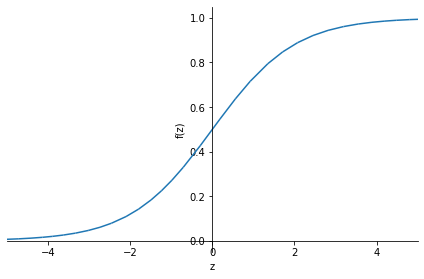

In [ ]:
import sympy
sympy.plot("1/(1+exp(-z))", xlim=(-5,5));


### Feed-forward fully connected neural network with ReLu units

The next step is to add more layers to the model. Instead of having just one output from the first (input) layer, the model can have many units in the following *hidden* layers. In general, the number of model outputs (output layer) is equal to the number of labels (one is enough for the Titanic problem, since the prediction is just "survived" or not). As mentioned earlier, typically there is either a *sigmoid* unit or a *softmax* layer to complete the model, so the final outputs can be interpreted as probabilities.

This model is also known as the *Multilayer Perceptron* (MLP).

If all the intermediate layers would just multiply inputs by weights, the model could be reduced to a single matrix multiplication layer. Therefore, there must some non-linearity after each matrix multiplication. That's what is described in the following figure, where $f$ represents some non-linear *activation function* for each layer of the neural network.

<img src="https://drive.google.com/uc?export=view&id=1Ky82nfC7GUp7YBqp1Spzn9aHDrTzbiCH" width="600" >

The layer is called *fully connected* when each matrix multiplication, which returns the dot product $x_1 \, w_1 + \dots + x_n \, w_n$ envolves all neurons from the previous layer.

Typically, all activation functions ($f$ in the figure above) for the *hidden layers* are called rectified linear units (*ReLu*) and they represent the following continuous function, which is the identity function for positive arguments and *zero* for negative arguments.

${\rm ReLu}(z) = \left\{\begin{align}
z &, &  z \ge 0 \\
0 &, &  z < 0 \\
\end{align} \right.$

If there is only one output, the activation layer for the *output layer* is typically the *sigmoid* function. If there is more than one output (as in the figure above), the typical choice of activation function for the output layer is the *softmax* function.

For first *neuron* in the first hidden unit, the calculation goes exactely as  we discussed for the perceptron model, where the inputs are multiplied by the  weights $w_1^{(1)},\dots, w_4^{(1)}$ to return

$$w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 .$$

The same product is computed for the second neuron of the first hidden layer, but for a *different set of weights* $w_1^{(2)},\dots, w_4^{(2)}$, and so on. Hence, in total there are for the example in the figure above, 12 multiplicative weights (4 input variables $\times$ 3 neuros in the hidden layer). The three multiplications (for the three neurons in the hidden layer) can all be done with a single matrix multiplication:

If the weights and input values are  $~~~~~
	{\rm W}= \begin{bmatrix}
	w_{1}^{(1)} & w_{2}^{(1)} & w_{3}^{(1)} & w_{4}^{(1)} \\
	w_{1}^{(2)} & w_{2}^{(2)} & w_{3}^{(2)} & w_{4}^{(2)} \\
	w_{1}^{(3)} & w_{2}^{(3)} & w_{3}^{(3)} & w_{4}^{(3)} \\
	\end{bmatrix}~~~{\rm and}~~~~
$
$
	{\rm x}= \begin{bmatrix}
	x_1  \\
	x_2 \\
	x_3  \\
	x_4  \\
	\end{bmatrix}~~~
$

then, the hidden layer three outputs (before applying the activation function) are just the rows of the product ${\rm W} \, {\rm x}$:

$$ {\rm  W} \, {\rm x}= \begin{bmatrix}
	w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4  \\
	w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4  \\
	w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4  \\
	\end{bmatrix}
.$$

This is very convenient since matrix multiplication can be computed quickly.

Note that it is usual to include also an *additive weight* for each neuron (this is called the *bias*). Without lost of generality, we can think that $x_1$ is an artificial input which value is always 1, and therefore $w_1^{(j)} \times x_1=w_1^{(j)}$ is the additive weight. In alternative, we can add a weight $w_0^{(j)}$ to each neuron, so the neuron output (before applying the activation function) is

$$w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 $$

in the above example.

Putting everything together, the three outputs of the first hidden layer are:

$$
	 {\rm ReLu} \left(w_0^{(1)} + w_1^{(1)} \, x_1 + w_2^{(1)} \, x_2 + w_3^{(1)} \, x_3 + w_4^{(1)} \, x_4 \right)  \\
   {\rm ReLu} \left(w_0^{(2)} + w_1^{(2)} \, x_1 + w_2^{(2)} \, x_2 + w_3^{(2)} \, x_3 + w_4^{(2)} \, x_4 \right)  \\
 {\rm ReLu} \left(w_0^{(3)} + w_1^{(3)} \, x_1 + w_2^{(3)} \, x_2 + w_3^{(3)} \, x_3 + w_4^{(3)} \, x_4 \right)  \\
$$

Then, calculations proceed to the following layer, and so on, until they reach  the output layer. This network is called *feed-forward* because computations are done sequentially layer by layer.



### Techniques to improve deep learning

**Regularization** is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function. This encourages the model to learn a simpler representation of the data and reduces its capacity to memorize the training data.

**Self-regularized activation functions** can help improve the generalization performance of a neural network by introducing an implicit form of regularization. This can be achieved through various mechanisms, such as controlling the distribution of the activations or the gradients. For example, the *Mish activation function* has been shown to have a self-regularizing effect due to its non-monotonic and smooth nature, which can help prevent the vanishing gradient problem and improve the training dynamics of deep neural networks.

The *Mish activation function* (https://arxiv.org/abs/1908.08681) is an alternative to *ReLu*. It is a smooth, continuous, self regularized, non-monotonic activation function mathematically defined as

$$f(x)= x \, {\rm tanh} (\ln (1+e^x)).$$

**Dropout** is a regularization technique used in deep learning to prevent overfitting. It works by randomly “dropping out” or deactivating some of the neurons in a neural network during training. This means that during each forward pass, some of the neurons are temporarily removed from the network, along with all their incoming and outgoing connections.

The idea behind dropout is to introduce randomness and prevent the model from relying too heavily on any single neuron or feature. By randomly dropping out neurons during training, the model is forced to learn a more robust representation of the data that is less sensitive to small changes in the input.

Dropout is typically applied to the hidden layers of a neural network and can be controlled by a hyperparameter called the dropout rate, which specifies the probability that any given neuron will be dropped out during training. A common value for the dropout rate is 0.5, meaning that on average, half of the neurons in a given layer will be dropped out during each forward pass.

During testing or inference, dropout is not applied and all neurons are active. However, to account for the fact that only a fraction of the neurons were active during training, the outputs of the neurons are typically scaled down by the dropout rate.

**Momentum**  is a technique used in deep learning to accelerate the training of neural networks. It is an optimization algorithm that helps the model converge faster by adding a fraction of the previous weight update to the current weight update.

In gradient descent, the weights of a neural network are updated by taking a step in the direction of the negative gradient of the loss function with respect to the weights. This can sometimes result in slow convergence or getting stuck in local minima. Momentum addresses these issues by introducing a “momentum” term that takes into account the previous weight updates.

The idea behind momentum is to add a fraction of the previous weight update to the current weight update, effectively “smoothing out” the updates and helping the model converge faster. This can be controlled by a hyperparameter called the momentum coefficient, which specifies how much of the previous weight update should be added to the current weight update. A common value for the momentum coefficient is 0.9.

Momentum can be used with various optimization algorithms, such as stochastic gradient descent (SGD) or Adam, to improve their convergence properties.

**Adam** (short for Adaptive Moment Estimation) is an optimization algorithm commonly used in deep learning to train neural networks. It is an extension of stochastic gradient descent (SGD) that incorporates ideas from other optimization algorithms such as AdaGrad and RMSProp.

Adam works by maintaining an estimate of the first and second moments of the gradients (i.e., the mean and uncentered variance) and using these estimates to adaptively adjust the learning rate for each weight in the network. This allows the algorithm to converge faster and achieve better performance than traditional SGD. For details, look at the [pseudo-code for Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html).

One of the key advantages of Adam is that it requires little tuning of its hyperparameters. The algorithm has three main hyperparameters: the learning rate, the first moment decay rate (beta1), and the second moment decay rate (beta2). The default values for these hyperparameters (0.001, 0.9, and 0.999, respectively) usually work well in practice. Adam has been shown to work well on a wide range of deep learning problems and is often used as the default optimizer in many deep learning frameworks.


**Batch normalization**  tries to maintain a good distribution of activations throughout training. The paper ["Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift"](https://arxiv.org/abs/1502.03167) addresses the realization that training Deep Neural Networks is complicated by the fact that the distribution of each layer's inputs changes during training, as the parameters of the previous layers change, which slows down training.

That problem, known as *internal covariate shift* can be addressed by normalizing layer inputs. Details of implementation can be found at [PyTorch documentation](https://pytorch.org/docs/stable/generated/torch.nn.functional.batch_norm.html).

The follownig code illustrates, for the CIFAR-10 data set (32$\times$32 color images) the use of `BatchNorm` in PyTorch to create a NN model.

```
nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.BatchNorm1d(64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.BatchNorm1d(32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )
```




**TensorBoard** is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more. See this  [Colab notebook that uses tensorboard with Keras](https://colab.research.google.com/github/tensorflow/tensorboard/blob/master/docs/tensorboard_in_notebooks.ipynb)

### Example of NN classifier implemented with PyTorch

`PyTorch` provides the designed modules and classes `torch.nn` , `torch.optim` , `Dataset` , and `DataLoader` to help you create and train neural networks. On their webpage, you can find a broad range of tutorials [https://pytorch.org/tutorials/](https://pytorch.org/tutorials/) and, in particular, on [`torch.nn`](https://pytorch.org/tutorials/beginner/nn_tutorial.html).

The following script creates a $n$-layer neural network with `PyTorch` and applies it to some available dataset (`iris` or the 8$\times$8 MNIST digit dataset). The script contains many parameters that have been discussed above, namely:
- architecture of the neural network;
- batch size;
- number of epochs
- learning rate;
- regularization parameter;
- momentum;
- dropout proportion.

The script illustrates how to create a dataloader in `PyTorch` which makes it easy to loop through mini-batches while training the model. It also plots train and test loss along epochs. This is useful to choose the best number of epochs to train the model and avoid overfitting.




Epoch [100/200], Train Loss: 0.8591, Test Loss: 0.3878
Epoch [200/200], Train Loss: 0.8437, Test Loss: 0.4352


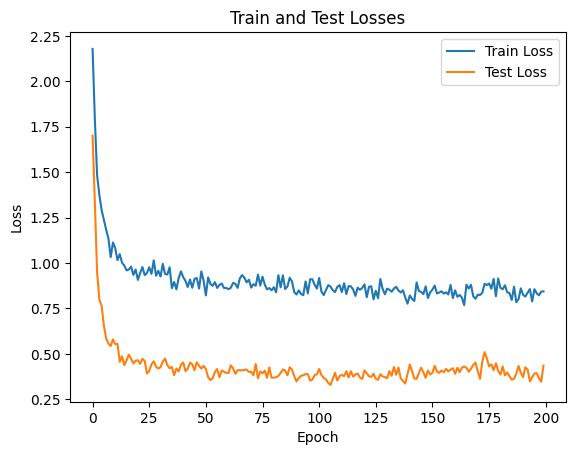

Accuracy on test set: 0.8833


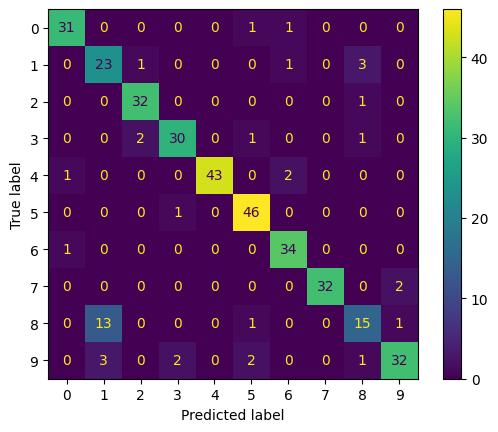

In [ ]:
#@title Script that implements a neural network with PyTorch (over the iris or mnist datasets)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import numpy as np

CREATE_CLASS=True # Create class from scratch; otherwise use nn.Sequential to create the class
SGD=False # SGD or Adam
IRIS=False # iris or mnist
SHOW=False # returns picture of digit for mnist

# Load Iris dataset
if IRIS:
    examples = load_iris()
else:
    examples = load_digits() # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
    if SHOW:
        idx=random.randint(0,len(examples.target))
        print(examples.data[idx])
        print(examples.data[idx].reshape(8,8))
        print(examples.target[idx])
        plt.matshow(examples.data[idx].reshape(8,8), cmap=plt.cm.gray_r)
        plt.show()

X = examples.data
y = examples.target

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Instantiate the model
input_size = X_train_tensor.shape[1]
hidden_size = 8
output_size = len(examples.target_names)
batch_size=400
num_epochs = 200
# Optimizer specific options
learning_rate=0.1
regularization_param=0.001
momentum_param=0.9
# Dropout: if p>0
dropout_p=0.25 # During training, randomly zeroes some of the elements of the input tensor with probability p.

# Create dataloader which makes it easier to use mini batches
train_dl=DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size, shuffle=True)

########################################################### NN model
if CREATE_CLASS:
    # Create model, first defining the class with a forward method
    class ThreeLayerNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(ThreeLayerNet, self).__init__()
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, output_size)
            self.dropout = nn.Dropout(p=dropout_p)  # Dropout layer with dropout probability
        def forward(self, x):
            x = torch.relu(self.fc1(x))
            x = self.dropout(x)  # Apply dropout after first hidden layer
            x = torch.relu(self.fc2(x))
            x = self.dropout(x)  # Apply dropout after second hidden layer
            x = self.fc3(x)
            return x
    model = ThreeLayerNet(input_size, hidden_size, output_size)
else:
    # Or, in alternative, use nn.Sequential
    model=nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Dropout(p=dropout_p),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Dropout(p=dropout_p),
        nn.Linear(hidden_size, output_size)
    )
####################################################################################################
# Define loss function and optimizer
# Either torch.nn.NLLLoss or torch.nn.CrossEntropyLoss can be used: CrossEntropyLoss (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) implements softmax internally
criterion = nn.CrossEntropyLoss() #
# Optimizer: optimizer object that will hold the current state and will update the parameters based on the computed gradients
# for param in model.parameters(): print(param.data)
if SGD:
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=regularization_param, momentum=momentum_param)
else:
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Lists to store train and test losses
train_losses = []
test_losses = []

# Training the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for x_batch, y_batch in train_dl:
        # Forward pass
        pred = model(x_batch) # Returns tensor: nrows=tensor batch_size; ncols=number of classes
        loss = criterion(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad() # Resets the gradients of all optimized tensors
        loss.backward() # Computes gradient
        optimizer.step() # Performs a single optimization step (parameter update).

        train_loss += loss.item() # .item() extracts the scalar value of the loss tensor

    train_loss /= len(train_dl)
    train_losses.append(train_loss)

    # Test the model
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        test_loss = criterion(outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plotting train and test losses
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Losses')
plt.legend()
plt.show()

# Testing the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1) # Returns a namedtuple (values, indices) where values is the maximum value of each row of the input tensor in the given dimension dim. And indices is the index location of each maximum value found (argmax).

actual=y_test_tensor.numpy()
pred=predicted.numpy()
accuracy = accuracy_score(actual, pred)
print(f'Accuracy on test set: {accuracy:.4f}')
cm=confusion_matrix(actual, pred)
labels = np.unique(actual)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()


Number of examples in training set: torch.Size([1437, 64])
Number of examples in test set: torch.Size([360, 64])


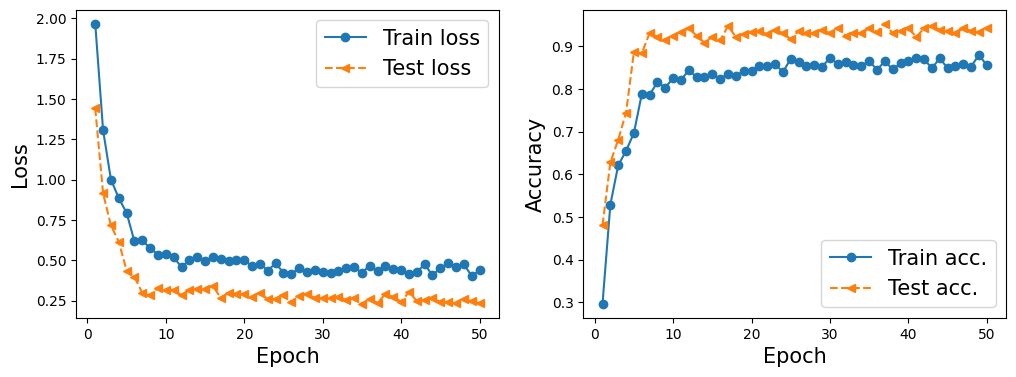

Accuracy on test set: 0.9125


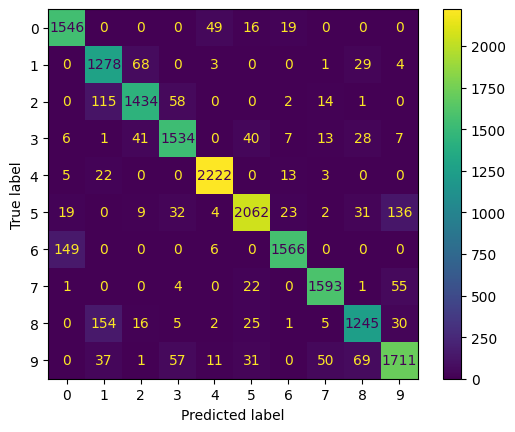

In [ ]:
#@title Improved (more modular) script that implements a neural network with PyTorch over the mnist 8 by 8 practice data set
# code adapted from https://github.com/rasbt/machine-learning-book/blob/main/ch14/ch14_part1.py

'''
This code does the following:
    Splits the dataset into training and testing sets.
    Standardizes the features using StandardScaler.
    Reshapes dataset to fit the model
    Instantiates the model (NN)
    Defines the loss function (Cross Entropy Loss) and optimizer (Adam).
    Trains the model for num_epochs epochs.
    Tests the trained model on the test set and evaluates the accuracy.
'''

import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_digits # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import numpy as np

########################################################################### my functions

def train(model, optimizer, loss_fn, num_epochs, train_dl, valid_dl):
    '''
    Main function to train and test the model
    '''
    # lists to strore losses and accuracies
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    # main loop through epochs
    for epoch in range(num_epochs):
        # training mode
        model.train()
        for x_batch, y_batch in train_dl:
            # core of the learning process: predict and fit
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # compute train loss and accuracy
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        # compute average loss per epoch
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        # we also put the model in evaluation mode, so that specific layers such as dropout or batch normalization layers behave correctly.
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                # predict
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
                if epoch==0:
                    preds,actuals=torch.argmax(pred, dim=1),y_batch
                else:
                    preds=torch.cat((preds,torch.argmax(pred, dim=1)),dim=0)
                    actuals=torch.cat((actuals,y_batch),dim=0)
        # compute average loss per epoch
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        # print accuracy
        if (epoch+1) % 100==0:
            print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid, preds,actuals


def plot_accuracy_from_predictions(hist):
    ''' Creates and prints confusion matrix from a model and a set of examples
    Inputs
    ------
    hist: tuple
        where hist[4] is the list of predicted values for test and hist[5] are the actual labels
    '''
    pred=hist[4].numpy()
    actual=hist[5].numpy()
    labels = np.unique(actual)
    disp = ConfusionMatrixDisplay.from_predictions(actual,pred,labels=labels)
    # print global accuracy
    accuracy=np.sum(np.diagonal(disp.confusion_matrix))/np.sum(disp.confusion_matrix)
    print(f'Accuracy on test set: {accuracy:.4f}')
    plt.show()

def plot_losses(hist):
    ''' plots train and test loss
    Input
    ------
    history, the output of function train()
    '''
    x_arr = np.arange(len(hist[0])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist[0], '-o', label='Train loss')
    ax.plot(x_arr, hist[1], '--<', label='Test loss')
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)
    ax.legend(fontsize=15)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist[2], '-o', label='Train acc.')
    ax.plot(x_arr, hist[3], '--<', label='Test acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

################################################################################ Data and parameters

SHOW=False # returns picture of a randomly chosen digit

examples = load_digits() # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
if SHOW:
    idx=random.randint(0,len(examples.target))
    print(examples.data[idx])
    print(examples.data[idx].reshape(8,8))
    print(examples.target[idx])
    plt.matshow(examples.data[idx].reshape(8,8), cmap=plt.cm.gray_r)
    plt.show()

X = examples.data # np.ndarray (1797, 64)
y = examples.target # (1797,)

# parameter constants
test_size=0.2
hidden_size = 8
batch_size= 256
num_epochs = 50
# Optimizer specific options
learning_rate=0.1
regularization_param=0.001
# Dropout: if p>0
dropout_p=0.1 # During training, randomly zeroes some of the elements of the input tensor with probability p.

########################################################################### train and test, pre-processing
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
print('Number of examples in training set:',X_train_tensor.shape)
print('Number of examples in test set:', X_test_tensor.shape)

# Instantiate the model
input_size = X_train_tensor.shape[1]
output_size = len(examples.target_names)

# Create dataloader with batch_size
train_dl=DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size, shuffle=True)
test_dl=DataLoader(TensorDataset(X_test_tensor,y_test_tensor), batch_size, shuffle=False)

###################################################################################### NN model
model=nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, output_size)
)

# Define loss function and optimizer
# Either torch.nn.NLLLoss or torch.nn.CrossEntropyLoss can be used: CrossEntropyLoss (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) implements softmax internally
loss_fn = nn.CrossEntropyLoss()

# Optimizer: optimizer object that will hold the current state and will update the parameters based on the computed gradients
# for param in model.parameters(): print(param.data)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Train the model and predict on test samples to estimate accuracy
# history stores losses, accuracy, actual labels and predictions
history = train(model, optimizer, loss_fn, num_epochs, train_dl, test_dl)

# plot losses along epochs
plot_losses(history)
# plot confusion matrix
plot_accuracy_from_predictions(history)
#plot_accuracy(hist)

## Image classification

Image classification applies a class label to an entire image. For example, a simple image classification model might be trained to categorize photographs of crops into their category as in https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification.


Convolutional neural networks (CNN) are the main machine learning models for image classification. They use image filters (aka covolutions) similarly to conventional image processing techniques to extract features from the images. However, CNN  are trained to determine their own image filters from examples. This is unlike the conventional approach where filters have to be carefully coded and are domain specific.



#### Convolutions and kernels

Note: For a detailed overview of convolutional neural networks see the notebook that includes `pytorch`code for computing convolutions:  https://github.com/fastai/fastbook/blob/master/13_convolutions.ipynb. Some concepts and examples from that notebook are included in the text below. For a friendly introduction to convolutions with nice animations, consider watching  the video [https://www.3blue1brown.com/lessons/convolutions](https://www.3blue1brown.com/lessons/convolutions).

A convolution applies a kernel across an image. A kernel is a little matrix, such as the 3×3 matrix below. The 7×7 grid to the left is the image we're going to apply the kernel to. The convolution operation multiplies each element of the kernel by each element of a 3×3 block of the image. The results of these multiplications are then added together. The diagram  shows an example of applying a kernel to a single location in the image, the 3×3 block around cell 18.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter9_conv_basic.png?raw=1" id="basic_conv" caption="Applying a kernel to one location" alt="Applying a kernel to one location" width="600">

In the paper ["A Guide to Convolution Arithmetic for Deep Learning"](https://arxiv.org/abs/1603.07285) there are many great diagrams showing how image kernels can be applied. Here's an example from the paper showing (at the bottom) a light blue 4×4 image, with a dark blue 3×3 kernel being applied, creating a 2×2 green output activation map at the top.

<img alt="Result of applying a 3×3 kernel to a 4×4 image" width="782" caption="Result of applying a 3×3 kernel to a 4×4 image (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_ex_four_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00028.png?raw=1">

What is the shape of the result? If the original image has a height of `h` and a width of `w`, how many 3×3 windows can we find? As you can see from the example, there are `h-2` by `w-2` windows, so the image we get has a result as a height of `h-2` and a width of `w-2`.

#### Padding, pooling, stride and activation map

**Feature map** (aka **activation map**) is the output of the application of the filter to some input image (which can be either the raw input image or some feature map) as illustrated in the figures above. The name *feature map* stresses the fact that convolution creates (or extracts) new features from some image. The name *activation map* (not to be confounded with the *activation function* of NNs) stresses that the high values in the output correspond to  parts of the input image that are activated by the convolution operation.

**Padding** consists in creating new cells on the margins of the input, with a given value (in general 0). With appropriate padding, we can ensure that the output **activation map** is the same size as the original image, which can make things a lot simpler when we construct our architectures. The figure below shows how adding padding allows us to apply the kernels in the image corners.

<img src="https://github.com/fastai/fastbook/blob/master/images/chapter9_padconv.svg?raw=1" id="pad_conv" caption="A convolution with padding" alt="A convolution with padding" width="600">

With a 5×5 input, 4×4 kernel, and 2 pixels of padding, we end up with a 6×6 activation map:

<img alt="A 4×4 kernel with 5×5 input and 2 pixels of padding" width="783" caption="A 4×4 kernel with 5×5 input and 2 pixels of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="four_by_five_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00029.png?raw=1">

If we apply to some image a kernel of size `ks` by `ks` (with `ks` an odd number), the necessary padding on each side to keep the same shape is `ks//2`. An even number for `ks` would require a different amount of padding on the top/bottom and left/right, but in practice we almost never use an even filter size.

**Stride**. So far, when we have applied the kernel to the grid, we have moved it one pixel over at a time. But we can jump further; for instance, we could move over two pixels after each kernel application, as in the figure below. This is known as a *stride-2* convolution and will reduce the size in the example from 5$\times$5 to 3$\times$3.

In short, **stride-2** convolutions are useful for decreasing the size of our outputs, and **stride-1** convolutions (with padding) are useful for adding layers while preserving the image size.

<img alt="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding" width="774" caption="A 3×3 kernel with 5×5 input, stride-2 convolution, and 1 pixel of padding (courtesy of Vincent Dumoulin and Francesco Visin)" id="three_by_five_conv" src="https://github.com/fastai/fastbook/blob/master/images/att_00030.png?raw=1">

In general, if the input image has size `h` $\times$ `w`, using a padding of 1 and a stride of 2 (as in the example above) will output an image of size `(h+1)//2` $\times$  `(w+1)//2`. The general formula for each dimension is `(n + 2*pad - ks)//stride + 1`, where `pad` is the padding, `ks`, the size of our kernel, and `stride` is the stride.

**Pooling** is a type of convolution with a fixed operation (not trainable) as illustrated in the example below. This can be used to reduce the size of a layer. However, pooling can be replaced by convolution with stride larger than 1 (see paper "Striving for Simplicity: The All Convolutional Net" at https://arxiv.org/abs/1412.6806).

<img src="https://epynn.net/_images/pool-01.svg"  width="600">


Next, we apply the operations described above to create a convolutional neural network. To that end, we adapt the script that implemented a neural network for classifying the examples in the 8$\times$8 MNIST data set.

We re-use all the auxiliary functions `train` (main function for training the neural network), `plot_accuracy_from_predictions` and `plot_losses`from the previous script. There are two main changes:
1. Additional pre-processing is need to reshape the examples to NCHW (batch size, channels, height and width);  
2. The model is expanded with *2D-convolutional* and *maxpool* layers.

You need to run the previous NN script first to define the auxiliary functions that this script uses.

(1437, 64)
Number of examples in training set: torch.Size([1437, 1, 8, 8])
Number of examples in test set: torch.Size([360, 1, 8, 8])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1              [-1, 8, 8, 8]              80
              ReLU-2              [-1, 8, 8, 8]               0
         MaxPool2d-3              [-1, 8, 4, 4]               0
           Flatten-4                  [-1, 128]               0
            Linear-5                    [-1, 8]           1,032
       BatchNorm1d-6                    [-1, 8]              16
              ReLU-7                    [-1, 8]               0
            Linear-8                    [-1, 8]              72
       BatchNorm1d-9                    [-1, 8]              16
             ReLU-10                    [-1, 8]               0
          Dropout-11                    [-1, 8]               0
           Linear-12             

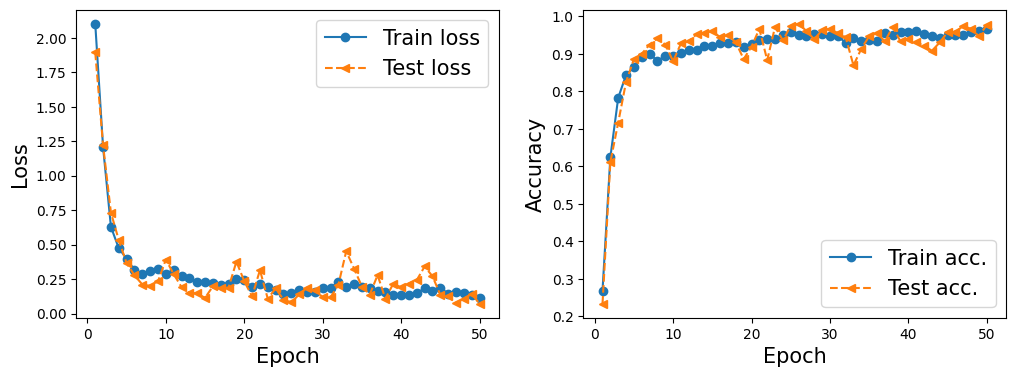

Accuracy on test set: 0.9217


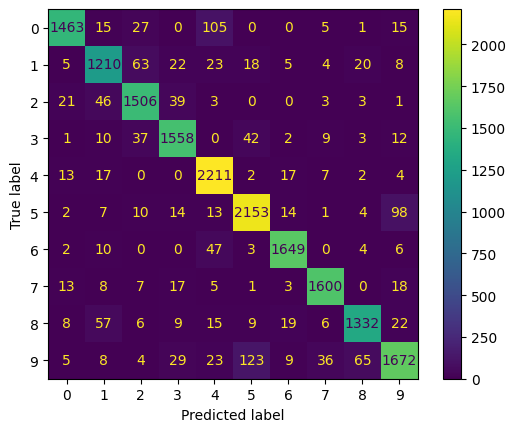

In [ ]:
#@title Script that implements a convolutional neural network with PyTorch over the mnist 8 by 8 practice data set
# code adapted from https://github.com/rasbt/machine-learning-book/blob/main/ch14/ch14_part1.py

'''
This code does the following:
    Splits the dataset into training and testing sets.
    Standardizes the features using StandardScaler.
    Reshapes dataset to fit the model
    Instantiates the model (CNN)
    Defines the loss function (Cross Entropy Loss) and optimizer (Adam).
    Trains the model for num_epochs epochs.
    Tests the trained model on the test set and evaluates the accuracy.
'''

import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import  load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import numpy as np

################################################################################ Data and parameters
SHOW=False # plot some digit for mnist 8*8

examples = load_digits() # https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html; 10 digits;  1797 examples
if SHOW:
    idx=random.randint(0,len(examples.target))
    print(examples.data[idx])
    print(examples.data[idx].reshape(8,8))
    print(examples.target[idx])
    plt.matshow(examples.data[idx].reshape(8,8), cmap=plt.cm.gray_r)
    plt.show()

X = examples.data # np.ndarray (1797, 64)
y = examples.target # (1797,)

# parameter constants
test_size=0.2
hidden_size = 8
batch_size= 256
num_epochs = 50
# Optimizer specific options
learning_rate=0.1
regularization_param=0.001
# Dropout: if p>0
dropout_p=0.1 # During training, randomly zeroes some of the elements of the input tensor with probability p.

########################################################################### train and test, pre-processing
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Standardize features
scaler = StandardScaler()
print(X_train.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# mnist data set has examples with 64 attributes
# We need to reshape that information into NCHW (batch size, channels, height, width)
def reshape_mnist(X,W,H):
    X=X.reshape((X.shape[0],W,H))
    return np.expand_dims(X,1) # one channel

# Convert numpy arrays to PyTorch tensors of the right shape (labels do not need to be reshaped)
X_train_tensor = torch.tensor(reshape_mnist(X_train,8,8), dtype=torch.float32)
X_test_tensor = torch.tensor(reshape_mnist(X_test,8,8), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
print('Number of examples in training set:',X_train_tensor.shape)
print('Number of examples in test set:', X_test_tensor.shape)

# Instantiate the model
input_size = X_train_tensor.shape[1]
output_size = len(examples.target_names)

# Create dataloader and determine batch size (note: batchsize is the first parameter in NCHW)
train_dl=DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size, shuffle=True)
test_dl=DataLoader(TensorDataset(X_test_tensor,y_test_tensor), batch_size, shuffle=True)

if SHOW:
    class_names = [str(i) for i in range(10)]
    # Plot the images
    plt.figure(figsize=(10, 5))
    image_count = 0
    for images, labels in train_dl:
        for i in range(len(images)):
            plt.subplot(4, 5, image_count + 1)
            plt.imshow(np.transpose(images[i], (1, 2, 0)), cmap="gray")
            plt.title(class_names[labels[i]])
            plt.axis('off')
            image_count += 1
            if image_count >= 20:
                break
        if image_count >= 20:
            break
    plt.show()

###################################################################################### CNN  model
model=nn.Sequential(
    nn.Conv2d(in_channels=1,out_channels=8,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(8*4*4, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, output_size)
)

'''
Compare with NN from previous script:
model=nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, hidden_size),
    nn.BatchNorm1d(hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, output_size)
)
'''
# model description
summary(model,(1,8,8)) # C, H, W

# Define loss function and optimizer
# Either torch.nn.NLLLoss or torch.nn.CrossEntropyLoss can be used: CrossEntropyLoss (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) implements softmax internally
loss_fn = nn.CrossEntropyLoss()

# Optimizer: optimizer object that will hold the current state and will update the parameters based on the computed gradients
# for param in model.parameters(): print(param.data)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Train the model and predict on test samples to estimate accuracy
# history stores losses, accuracy, actual labels and predictions
history = train(model, optimizer, loss_fn, num_epochs, train_dl, test_dl)

# plot losses along epochs
plot_losses(history)
# plot confusion matrix
plot_accuracy_from_predictions(history)
#plot_accuracy(hist)




### CNN model parameters

The number of parameters depend on the kernel size, the number of input channels and the number of output features.

In the previous example, the architecture returned by `summary` is:

|        Layer (type)       |        Output Shape     |    Param #|
| --- | ---: | ---: |
|            Conv2d-1       |       [-1, 8, 8, 8]     |         80|
|              ReLU-2       |       [-1, 8, 8, 8]     |          0|
|         MaxPool2d-3       |       [-1, 8, 4, 4]     |          0|
|           Flatten-4       |           [-1, 128]     |          0|
|            Linear-5       |             [-1, 8]     |     1,032|
| BatchNorm1d-6 |  [-1, 8]        |      16 |
|              ReLU-7       |             [-1, 8]     |         0|
|            Linear-8       |             [-1, 8]     |         72|
| BatchNorm1d-9 |  [-1, 8]        |      16 |
|              ReLU-10       |             [-1, 8]     |          0|
|           Dropout-11       |             [-1, 8]     |          0|
|           Linear-12       |            [-1, 10]     |         90|

In the summary above, the output shape format is NCHW and therefore `-1` refers to the batch size which can be replaced by some arbitrary value. The input, before applying the `Conv2d` layer, has C=1 since its a gray image.

The summary shows we have 80 parameters for the first convolution, since there are 9 parameters for the 3$\times$3 kernel plus one additive parameters (bias). In total there are 10 parameters for each convolution map. However, since the depth of the output of the convulational layer is 8, i.e., the model extracts 8 different feature maps, and hence uses 80 parameters for the `Conv2d`layer.

`ReLu`, `MaxPool2d` or `Flatten` do not add new parameters. However, `MaxPool2d` reduces the size of each feature map to 4$\times$4, which means that after flattenning it, there are only 16 values per map to be fed into the fully connected linear layers. For instance, `Linear-5` ingests those 16$\times$8=128 values and maps them to a 8-node layer. The number of parameters for `Linear-5` is then (128+1)$\times$8=1032.

### Adapt parameters to a different dataset

The code above shows how to adapt the script that *that implements a convolutional neural network with PyTorch over the mnist 8 by 8 practice data set* to a much larger data set called [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Each example in `CIFAR10` is a color image of size 32$\times$32. This means that C=3, H=32 and W=32, while in the previous example with `MNIST`, C=1, H=8 and W=8.

At this point we use the same small convolutional neural network as before. The output size, which is the number of classes is still 10 for `CIFAR10`.

Firstly, **change your runtime to CPU** (we will see in the following example how to use GPU) and run the *Improved (more modular) script that implements a neural network with PyTorch over the mnist 8 by 8 practice data set* to define the auxiliary functions that this script uses.

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])
<class 'torch.Tensor'>


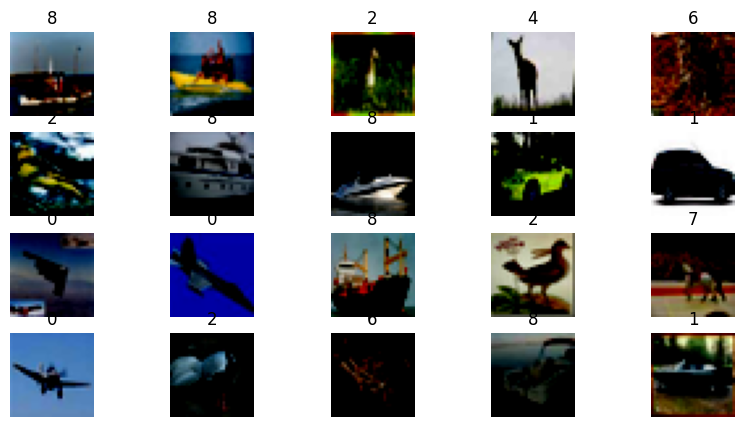

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             224
              ReLU-2            [-1, 8, 32, 32]               0
         MaxPool2d-3            [-1, 8, 16, 16]               0
           Flatten-4                 [-1, 2048]               0
            Linear-5                    [-1, 8]          16,392
              ReLU-6                    [-1, 8]               0
            Linear-7                    [-1, 8]              72
              ReLU-8                    [-1, 8]               0
           Dropout-9                    [-1, 8]               0
           Linear-10                   [-1, 10]              90
Total params: 16,778
Trainable params: 16,778
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.16
Params size (MB): 0.06
Estimated Tot

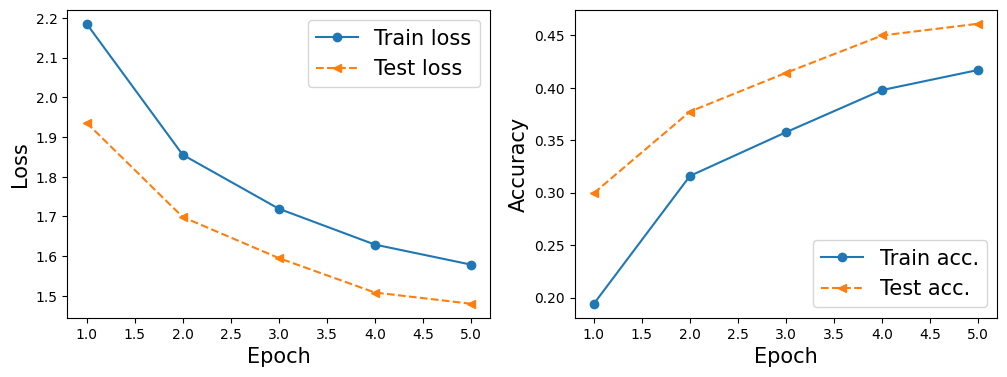

Accuracy on test set: 0.4247


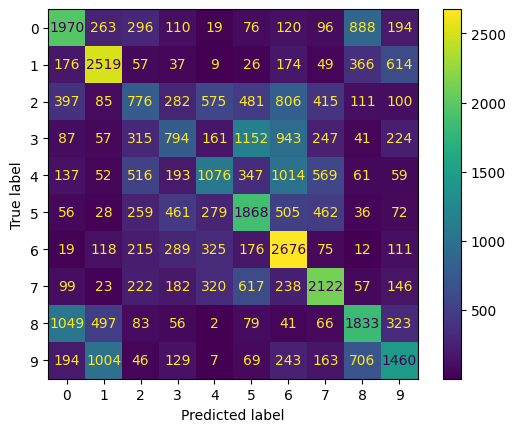

In [ ]:
#@title Script that adapts the CNN designed with PyTorch for MNIST to the CIFAR10 data set

'''
This code does the following:
    Splits the dataset into training and testing sets.
    Standardizes the features using StandardScaler.
    Reshapes dataset to fit the model
    Instantiates the model (NN or CNN)
    Defines the loss function (Cross Entropy Loss) and optimizer (Adam).
    Trains the model for num_epochs epochs.
    Tests the trained model on the test set and evaluates the accuracy.
'''

import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from sklearn.datasets import  load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import numpy as np

################################################################################ Data and parameters
SHOW=True # show some images

# parameter constants
test_size=0.2
hidden_size = 8
batch_size= 250
num_epochs = 5
# Optimizer specific options
learning_rate=0.001
regularization_param=0.001
# Dropout: if p>0
dropout_p=0.1 # During training, randomly zeroes some of the elements of the input tensor with probability p.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_dl = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,shuffle=True)

test_dl = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img, labels):
        img = img * 0.5 + 0.5  # unnormalize
        npimg = img.numpy()
        print(npimg.shape)
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
        plt.title(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
        plt.show()

if SHOW:
    # get some random training images
    dataiter = iter(train_dl)
    images, labels = next(dataiter)
    print(images[0].shape) # 3*32*32
    print(type(images[0])) # torch tensor
    # show images
    image_batch=torchvision.utils.make_grid(images)
    #print(image_batch[0].shape)
    #imshow(image_batch, labels)


# Instantiate the model
dataiter = iter(train_dl)
images, labels = next(dataiter)
(C,H,W)=images[0].shape # 3*32*32
output_size = len(classes)

########################################################################### train and test, pre-processing

if SHOW:
    class_names = [str(i) for i in range(10)]
    # Plot the images
    plt.figure(figsize=(10, 5))
    image_count = 0
    for images, labels in train_dl:
        for i in range(len(images)):
            plt.subplot(4, 5, image_count + 1)
            plt.imshow(np.transpose(images[i], (1, 2, 0)), cmap="gray")
            plt.title(class_names[labels[i]])
            plt.axis('off')
            image_count += 1
            if image_count >= 20:
                break
        if image_count >= 20:
            break
    plt.show()

###################################################################################### CNN  model
model=nn.Sequential(
    nn.Conv2d(in_channels=C,out_channels=8,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(2*W*H, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Dropout(p=dropout_p),
    nn.Linear(hidden_size, output_size)
)

# to the correct processor:: 'cpu' or 'cuda'
#model=model.to('cpu')

# model description
summary(model,(C,H,W)) # C, H, W

# Define loss function and optimizer
# Either torch.nn.NLLLoss or torch.nn.CrossEntropyLoss can be used: CrossEntropyLoss (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) implements softmax internally
loss_fn = nn.CrossEntropyLoss()

# Optimizer: optimizer object that will hold the current state and will update the parameters based on the computed gradients
# for param in model.parameters(): print(param.data)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Train the model and predict on test samples to estimate accuracy
# history stores losses, accuracy, actual labels and predictions
history = train(model, optimizer, loss_fn, num_epochs, train_dl, test_dl)

# plot losses along epochs
plot_losses(history)
# plot confusion matrix
plot_accuracy_from_predictions(history)
#plot_accuracy(hist)


### Receptive Fields

The *receptive field* is the area of an image that is involved in the calculation of a layer.

<img alt="Secondary precedents of conv2 layer" width="700" caption="Secondary precedents of Conv2 layer" id="preced2" src="https://github.com/fastai/fastbook/blob/master/images/att_00069.png?raw=1">

In this example, we have just two convolutional layers, each of stride 2, so this is now tracing right back to the input image. We can see that a 7×7 area of cells in the input layer is used to calculate the single green cell in the Conv2 layer. This 7×7 area is the *receptive field* in the input of the green activation in Conv2. We can also see that a second filter kernel is needed now, since we have two layers.

As you see from this example, the deeper we are in the network (specifically, the more stride-2 convs we have before a layer), the larger the receptive field for an activation in that layer. A large receptive field means that a large amount of the input image is used to calculate each activation in that layer is. We now know that in the deeper layers of the network we have semantically rich features, corresponding to larger receptive fields. Therefore, we'd expect that we'd need more weights for each of our features to handle this increasing complexity. This is another way of saying the same thing we mentioned in the previous section: when we introduce a stride-2 conv in our network, we should also increase the number of channels.

### CNN as Encoders

[LeNet](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf),  [AlexNet](https://dl.acm.org/doi/10.1145/3065386) and  [VGG Net](https://arxiv.org/abs/1409.1556) are examples of convolutional neural networks for image classification. Typically, they have an input layer which is a tensor that represents an image with dimension *(number rows, number columns, number channels)*, followed by sets of *convolutional* layers, *ReLu* layers, and *pooling* layers, and at the end they have a couple of   *fully connected layers*  followed by a *sofwmax* or a *sigmoid layer*.

The idea behind those kind of architectures is to extrat *deep* features through the sequential application of convolutional and maxpool (or stride larger than 1) layers. In that sense, the network is designed to encode deep features of the input into its deep layers.

LeNet:

<img src="https://drive.google.com/uc?export=view&id=1-Nxj4sRWiWmjWcPgVnqcoSItiuJo38oH" width="700" >


VGG-net:

<img src="https://drive.google.com/uc?export=view&id=1hoR6Qxda7Ls0VsY-xAzSz1ddlL6IEAnT" width="700" >



Those kind of networks exhibit the following structure:
1.  reduction of width and height dimensions of input through each layer in this network;
2. accompanied by an organized increment in the number of features (channels) in each layer.




### Resnets

The early convolutional neural network had a few layers and possibly large kernels (up to 11$\times$11) for the  [AlexNet](https://dl.acm.org/doi/10.1145/3065386). Later influential models like the [VGG Net](https://arxiv.org/abs/1409.1556) used very small convolution filters and deeper networks which are more powerfull but also are more difficult to train due to the so-called *degradation problem*:  with the network depth increasing, accuracy gets saturated and then degrades rapidly.

That problem can be overcome with residual networks known as [resnets](https://arxiv.org/abs/1512.03385). The main idea is that it is easier to train neural network to find a vanishing mapping than to approximate more complicated functions. The residual block (shown below) converts the problem of training $F(x)$ for an arbitrary expected output $H(x)$ into the problem of training $F(x)$ for $H(x)-x$, which is a residual and should ideally vanish.

<img src="https://miro.medium.com/v2/resize:fit:1140/format:webp/1*D0F3UitQ2l5Q0Ak-tjEdJg.png" width="400" >


As an exemple, see below the full diagram that describes `resnet18`. The arrows represent the application of the identity function. That architecture, proposed in https://arxiv.org/abs/1512.03385, reformulate the layers as learning residual functions with reference to the layer inputs, instead of learning unreferenced functions. Those residual networks are easier to optimize, and can gain accuracy from considerably increased depth.

<img src="https://www.researchgate.net/profile/Sajid-Iqbal-13/publication/336642248/figure/fig1/AS:839151377203201@1577080687133/Original-ResNet-18-Architecture_W640.jpg" width="700" >

## Image segmentation

Image segmentation (see for instance https://www.ibm.com/topics/image-segmentation) is a computer vision technique that partitions a digital image into discrete groups of pixels called image segments.

Unlike image classification, where the entire image is one example to be labeled, image segmentation processes visual data at the pixel level, using various techniques to annotate individual pixels as belonging to a specific class or instance.

Traditional image segmentation techniques use information from a pixel's color values and related characteristics like brightness, contrast or intensity  for feature extraction. Neural networks of deep learning image segmentation models are trained on annotated dataset of images and tend to require much more computational resourses. Despite those tradeoffs in computing requirements and training time, deep learning models consistently outperform traditional models and form the basis of most ongoing advancements in computer vision.

According to https://www.ibm.com/topics/image-segmentation, prominent deep learning models used in image segmentation include:

1. Fully Convolutional Networks (FCNs): FCNs, often used for semantic segmentation, are a type of convolutional neural network (CNN) with no fixed layers. An encoder network passes visual input data through convolutional layers to extract features relevant to segmentation or classification, and compresses (or downsamples) this feature data to remove non-essential information. This compressed data is then fed into decoder layers, upsampling the extracted feature data to reconstruct the input image with segmentation masks.

2. U-Nets: U-Nets modify FCN architecture to reduce data loss during downsampling with skip connections, preserving greater detail by selectively bypassing some convolutional layers as information and gradients move through the neural network. Its name is derived from the shape of diagrams demonstrating the arrangement of its layers.

3. Deeplab: Like U-Nets, Deeplab is a modified FCN architecture. In addition to skip connections, it uses diluted (or “atrous”) convolution to yield larger output maps without necessitating additional computational power.

4. Mask R-CNNs: Mask R-CNNs are a leading model for instance segmentation. Mask R-CNNs combine a region proposal network (RPN) that generates bounding boxes for each potential instance with an FCN-based “mask head” that generates segmentation masks within each confirmed bounding box.

5. Transformers: inspired by the success of transformer models in natural language processing, new models like Vision Transformer (ViT) using attention mechanisms in place of convolutional layers have matched or exceeded CNN performance for computer vision tasks.

Below, the architecture of U-nets (https://arxiv.org/abs/1505.04597) is illustrated. The U shape of the diagram represntes the encoder part, that converts input into a small and deep feature map, followed by a decoder part that generates a output with the same number of rows and columns as the input. The output's pixels are labeled such that the it provides a segmentation of the input image.


<img src="https://www.frontiersin.org/files/Articles/841297/fnagi-14-841297-HTML-r2/image_m/fnagi-14-841297-g001.jpg" width="700" >

This approach for image segmentation can be applied to large images by an *overlap-tile strategy* as illustrated by Figure 2 in https://arxiv.org/abs/1505.04597.

A commented example of the use of a U-Net to segment street photos for  self-driving cars is available at [Image_Segmentation_with_Unet.ipynb](Image_Segmentation_with_Unet.ipynb). This is implemented with the `fastai` package.





## Pre-trained models and transfer learning

One of the main tools available im Machine Learning is called *Transfer learning* which allows us to leverage powerful resources that are already available. Currently, there are many pre-trained models freely available, which have been trained with large amounts of data. We can access those pre-trained models to solve the problem at hand. In order to do that, we need:
1. To adapt the input size;


device cuda
Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

100%|██████████| 100/100 [01:35<00:00,  1.04it/s]


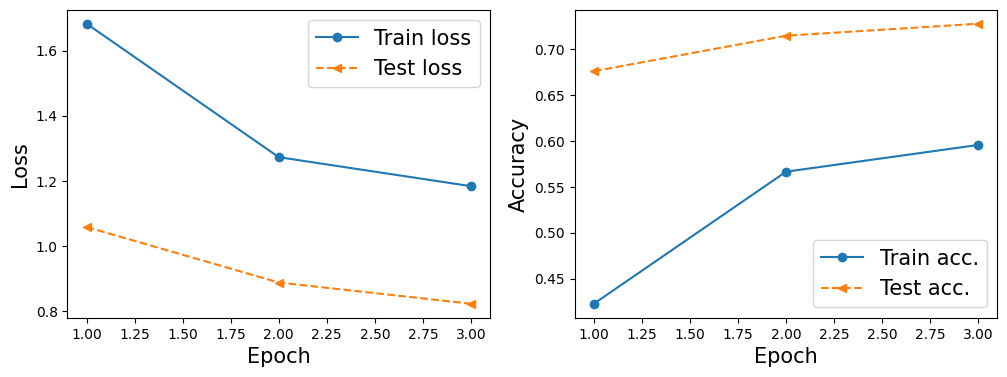

Accuracy on test set: 0.7216


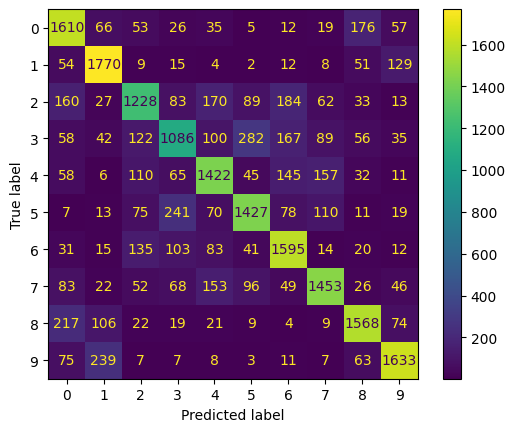

In [ ]:
#@title PyTorch script that uploads a pre-trained Resnet for the Cifar10 data set
# code adapted from https://github.com/rasbt/machine-learning-book/blob/main/ch14/ch14_part1.py


# todo -- just with PyTorch
# 1. Read CIFAR10
# 2. Upload pre-trained resnet
# 3. Customize model to the data
# 4. Fine tune
# 5. Save tuned model
# 6. predict with savel model

'''
This code does the following:
    Splits the dataset into training and testing sets.
    Standardizes the features using StandardScaler.
    Reshapes dataset to fit the model
    Instantiates the model (CNN)
    Defines the loss function (Cross Entropy Loss) and optimizer (Adam).
    Trains the model for num_epochs epochs.
    Tests the trained model on the test set and evaluates the accuracy.
'''

import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18, ResNet18_Weights
from sklearn.datasets import  load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import numpy as np
from pathlib import Path
from tqdm import tqdm

################################################################################  functions

def train(model, optimizer, loss_fn, num_epochs, train_dl, valid_dl):
    '''
    Main function to train and test the model
    '''
    # lists to strore losses and accuracies
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    # main loop through epochs
    for epoch in range(num_epochs):
        # training mode
        model.train()
        for x_batch, y_batch in tqdm(train_dl):
            x_batch,y_batch=x_batch.to(device),y_batch.to(device)  # edited
            # core of the learning process: predict and fit
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # compute train loss and accuracy
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()
        # compute average loss per epoch
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        # we also put the model in evaluation mode, so that specific layers such as dropout or batch normalization layers behave correctly.
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch,y_batch=x_batch.to(device),y_batch.to(device) # edited
                # predict
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()
                if epoch==0:
                    preds,actuals=torch.argmax(pred, dim=1),y_batch
                else:
                    preds=torch.cat((preds,torch.argmax(pred, dim=1)),dim=0)
                    actuals=torch.cat((actuals,y_batch),dim=0)
        # compute average loss per epoch
        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        # print accuracy
        if (epoch+1) % 100==0:
            print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid, preds,actuals


def plot_accuracy_from_predictions(hist):
    ''' Creates and prints confusion matrix from a model and a set of examples
    Inputs
    ------
    hist: tuple
        where hist[4] is the list of predicted values for test and hist[5] are the actual labels
    '''
    pred=[t.item() for t in hist[4]]
    actual=[t.item() for t in hist[5]]
    labels = np.unique(actual)
    disp = ConfusionMatrixDisplay.from_predictions(actual,pred,labels=labels)
    # print global accuracy
    accuracy=np.sum(np.diagonal(disp.confusion_matrix))/np.sum(disp.confusion_matrix)
    print(f'Accuracy on test set: {accuracy:.4f}')
    plt.show()

# TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.
def plot_losses(hist):
    ''' plots train and test loss
    Input
    ------
    history, the output of function train()
    '''
    x_arr = np.arange(len(hist[0])) + 1
    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist[0] , '-o', label='Train loss')
    ax.plot(x_arr, hist[1], '--<', label='Test loss')
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)
    ax.legend(fontsize=15)
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, [t.item() for t in hist[2]], '-o', label='Train acc.') # tensors in cuda cannot be plotted; .item extracts the value to cpu
    ax.plot(x_arr, [t.item() for t in hist[3]], '--<', label='Test acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

################################################################################ Data and parameters
SHOW=False # show some images
DOWNLOAD=True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # checks is cuda (GPU) is available
print('device',device)

# parameter constants
test_size=0.2
hidden_size = 8
batch_size= 500
num_epochs = 3
# CIFAR-10 images
NUM_CLASSES=10
# Optimizer specific options
learning_rate=0.001
regularization_param=0.001
# Dropout: if p>0
dropout_p=0.1 # During training, randomly zeroes some of the elements of the input tensor with probability p.

# Data augmentation and normalization for training
# https://pytorch.org/vision/main/auto_examples/transforms/plot_transforms_illustrations.html#sphx-glr-auto-examples-transforms-plot-transforms-illustrations-py
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224), # see "Size matters" https://arxiv.org/pdf/2102.01582.pdf
        transforms.RandomHorizontalFlip(),  #optional
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256), # bilinear by default
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Create directory to store images
path=Path('./gdrive/MyDrive/PML_2024/cifar10')
if not path.exists():
    path.mkdir(exist_ok=True, parents=True)

# read CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root=path, train=True,download=DOWNLOAD, transform=data_transforms['train'])
test_dataset = torchvision.datasets.CIFAR10(root=path, train=False,download=DOWNLOAD, transform=data_transforms['test'])
#after transform
C=3
H=224
W=224

# CIFAR10 classes
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

train_dl = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

if SHOW:
    # Get a batch of training data
    inputs, classes = next(iter(train_dl))
    # Make a grid from batch
    out = torchvision.utils.make_grid(inputs)
    imshow(out, title=[class_names[x] for x in classes])
    plt.show()

###################################################################################### upload resnet model


model = resnet18(pretrained=True)
model.fc=nn.Linear(512, NUM_CLASSES)

model.requires_grad_(False)
model.fc.requires_grad_(True)

# to the correct processor
model=model.to(device)

# model description
summary(model,(C,H,W)) # C, H, W

# Define loss function and optimizer
# Either torch.nn.NLLLoss or torch.nn.CrossEntropyLoss can be used: CrossEntropyLoss (https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) implements softmax internally
loss_fn = nn.CrossEntropyLoss()

# Optimizer: optimizer object that will hold the current state and will update the parameters based on the computed gradients
# for param in model.parameters(): print(param.data)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization_param)

# Train the model and predict on test samples to estimate accuracy
# history stores losses, accuracy, actual labels and predictions
history = train(model, optimizer, loss_fn, num_epochs, train_dl, test_dl)

# plot losses along epochs
plot_losses(history)
# plot confusion matrix
plot_accuracy_from_predictions(history)
#plot_accuracy(hist)


# Deploying ML models in production


<img src="https://dezyre.gumlet.io/images/blog/machine-learning-model-deployment/Machine_Learning_Model_Deployment_Tutorial.png?w=1100&dpr=1.5" width="700" >

Some useful links:

1. Saving and loading `PyTorch`models:  https://pytorch.org/tutorials/beginner/saving_loading_models.html


2. Steps to create a web application with `Gradio` to deploy a `PyTorch` model for image classification: https://www.gradio.app/guides/image-classification-in-pytorch

3. Gradio + HuggingFace Spaces: A Tutorial: https://www.tanishq.ai/blog/posts/2021-11-16-gradio-huggingface.html

In [ ]:
#@title Script for deploying the corn disease classifier with Gradio

import gradio as gr
import torch
from torchvision import transforms
from torchvision.models import resnet18, ResNet18_Weights
from torch import nn
from PIL import Image # pip install pillow

labels = ['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']

# Same data transformation that was used for inputs (except data augmentation)
data_transform = transforms.Compose([
    transforms.Resize(size=(256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# https://pytorch.org/tutorials/beginner/saving_loading_models.html
# Loading Model for Inference with state_dict (recommended)
model = resnet18(weights=ResNet18_Weights.DEFAULT)
model.fc = nn.Linear(in_features=512, out_features=len(labels))
model.load_state_dict(torch.load("model.pth",map_location=torch.device('cpu')))
model.eval()

def predict(img):
    X = data_transform(img).unsqueeze(0) # returns tensor
    with torch.no_grad():
            predictions = model(X).flatten()
            predictions = torch.nn.functional.softmax(predictions)
            confidences = {labels[i]: float(predictions[i]) for i in range(len(labels))}
    return confidences

demo=gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=len(labels)),
             examples=["Corn_Blight.jpg", "Corn_Common_Rust.jpg","Corn_Gray_Spot.jpg","Corn_Health.jpg"])

demo.launch('share=True')

The following figure shows the list of files that were created/uploaded to the Hugging Face space in order to create the app available at

<img src="https://drive.google.com/uc?export=view&id=1--lEvbmxYxZN8kWsaBc6nNbdi-jLvYoD" width="600" >

